In [232]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('results.csv')

# Printing the sample head
print(data.head())

   id    name      input compiler  threads      real       usr       sys  \
0   1  ferret     simdev      gcc        1  0m0.023s  0m0.030s  0m0.005s   
1   2  ferret   simsmall      gcc        1  0m0.395s  0m0.343s  0m0.017s   
2   3  ferret  simmedium      gcc        1  0m1.470s  0m1.345s  0m0.052s   
3   4  ferret   simlarge      gcc        1  0m6.867s  0m6.535s  0m0.145s   
4   5  ferret     native      gcc        1  6m50.895  6m40.672  0m1.619s   

   cores  
0      1  
1      1  
2      1  
3      1  
4      1  


In [233]:
# Changing the view of jupyter notebook to preview charts properly
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [234]:
# Converting execution time to milliseconds
def convertExecutionTime(time):
    MIN_TO_MIL_SECONDS = 60000
    SECONDS_TO_MIL_SECONDS = 1000
    min,seconds = time.split('m')
    seconds = seconds.replace('s','')
    min = int(min) 
    seconds = float(seconds)
    fullTimeinMilliseconds = int(min * MIN_TO_MIL_SECONDS + seconds * SECONDS_TO_MIL_SECONDS) 
    return fullTimeinMilliseconds

data['real'] = data['real'].apply(convertExecutionTime)
data['usr'] = data['usr'].apply(convertExecutionTime)
data['sys'] = data['sys'].apply(convertExecutionTime)

data.to_csv('processed-1.csv')

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3855 entries, 0 to 3854
Data columns (total 9 columns):
id          3855 non-null int64
name        3855 non-null object
input       3855 non-null object
compiler    3855 non-null object
threads     3855 non-null int64
real        3855 non-null int64
usr         3855 non-null int64
sys         3855 non-null int64
cores       3855 non-null int64
dtypes: int64(6), object(3)
memory usage: 271.2+ KB


In [236]:
print(data.describe())

                id      threads           real            usr           sys  \
count  3855.000000  3855.000000    3855.000000    3855.000000   3855.000000   
mean   1928.000000    10.463035   38554.242542   44830.111284   1485.290013   
std    1112.986972    10.824693   88747.774795  112770.703391   4259.727504   
min       1.000000     1.000000       4.000000       0.000000      1.000000   
25%     964.500000     2.000000     260.500000     227.000000     18.000000   
50%    1928.000000     4.000000    1122.000000    1185.000000     45.000000   
75%    2891.500000    16.000000    9116.000000    7515.500000    747.500000   
max    3855.000000    32.000000  420039.000000  413117.000000  28688.000000   

             cores  
count  3855.000000  
mean     16.439689  
std       9.266701  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      24.000000  
max      32.000000  


## Plottting charts for gcc-compiler based implementations ( No-Concurrency)

- Data is associating 1 user thread

In [237]:
c1data = data.loc[data['compiler'] == "gcc"]

array(['simdev', 'simsmall', 'simmedium', 'simlarge', 'native'],
      dtype=object)

<Figure size 1440x1440 with 0 Axes>

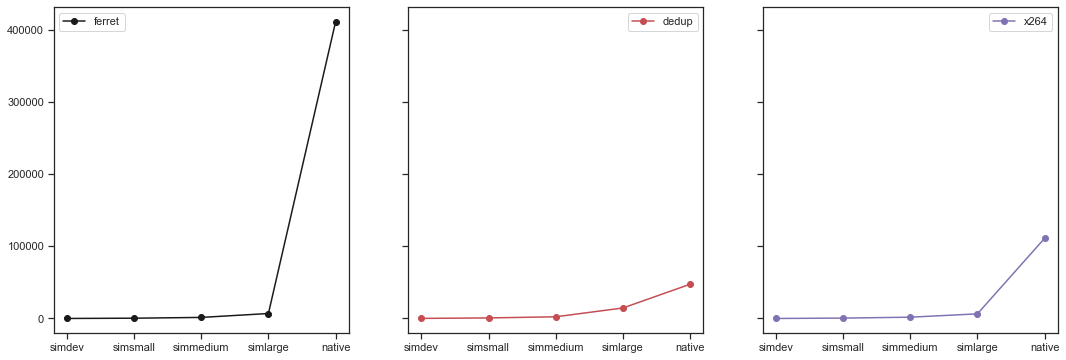

In [238]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


axs[0].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "ferret"])['real'],'ko-',label='ferret') #no need for str(x_axis)
axs[1].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "dedup"])['real'],'ro-',label='dedup') 
axs[2].plot(c1data['input'].unique(),(c1data.loc[data['name'] == "x264"])['real'],'mo-',label='x264') 
axs[0].legend()
axs[1].legend()
axs[2].legend()

c1data['input'].unique()

#=======================================================================================================================================
#================ Chars for 3 benchmarks : native workload for gcc compiler configuration which is 1 thread and 1 core==================
#=======================================================================================================================================

# Statistical analysis for concurreny supportive compiler configurations

In [239]:
# Visualizations for ferret benchmark

ferretData =data.loc[(data['name'] == "ferret") & (data['compiler'] != "gcc")]
dedupData =data.loc[(data['name'] == "dedup") & (data['compiler'] == "gcc-pthreads")]
x264Data =data.loc[(data['name'] == "x264") & (data['compiler'] == "gcc-pthreads")]

# Input combinations in the dataset
inputCombinations = ferretPThreadData['input'].unique()
# Thread combinations in the dataset    
threadCombinations = ferretData['threads'].unique()
# cores combinations in the dataset
coresCombinations = ferretData['cores'].unique()

#plots core
plt_coresCombinations = [1,2,4,8,16,32]

In [240]:
#  Drawing the matrix chart
def drawMatrixChartForInputs(x,data,axs,combinations,multiline,title,xlabel,ylabel,column='threads'):
    j=0
    for inputCombination in inputCombinations:
        y = data.loc[(data['input'] == inputCombination) ]
        y.head()
        minimum = min(y['real'])
        maximum = max(y['real'])
        i = 0
        for combination in combinations:
            axs[j][i].plot(x,(y.loc[y['threads'] == combination])['real'],label=(str(combination)+"-"+multiline),marker="o")
            axs[j][i].legend(loc=2)
            axs[j][i].set_xlabel('cores', fontsize=12)
            axs[j][i].set_ylabel('execution time', fontsize=12)
            axs[j][i].set_title(inputCombination, fontsize=14)
            axs[j][i].set_ylim(bottom=minimum,top=maximum)
            annot_max(x,(y.loc[y['threads'] == combination])['real'],axs[j,i])
            i = i +1
        j = j +1
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)

#Drawing a single Chart
def drawChartForInputs(x,y,axs,combinations,multiline,title,xlabel,ylabel,column='threads'):
    plt.rcParams["figure.figsize"] = (20,20)
    for combination in combinations:
        plt.plot(x,(y.loc[y[column] == combination])['real'],label=(str(combination)+"-"+multiline),marker="o")
      

    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
    plt.title(title,fontsize=16)
    annot_max(x,(y.loc[y['threads'] == combination])['real'],plt)
    plt.legend(loc=2)

def annot_max(x,y, ax=None):
    xmin = data.iloc[y.idxmin].cores
    ymin = y.min()
    text= "x={:.3f}, y={:.3f}".format(xmin, ymin)
    if not ax:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    ax.annotate(text, xy=(xmin, ymin), xytext=(0.94,0.96), **kw)


## Analysis with threads and execution time for different number of cores

### Ferret Analysis

In [269]:
# phtread version
ferretPThreadData =ferretData.loc[ferretData['compiler'] == "gcc-pthreads"]

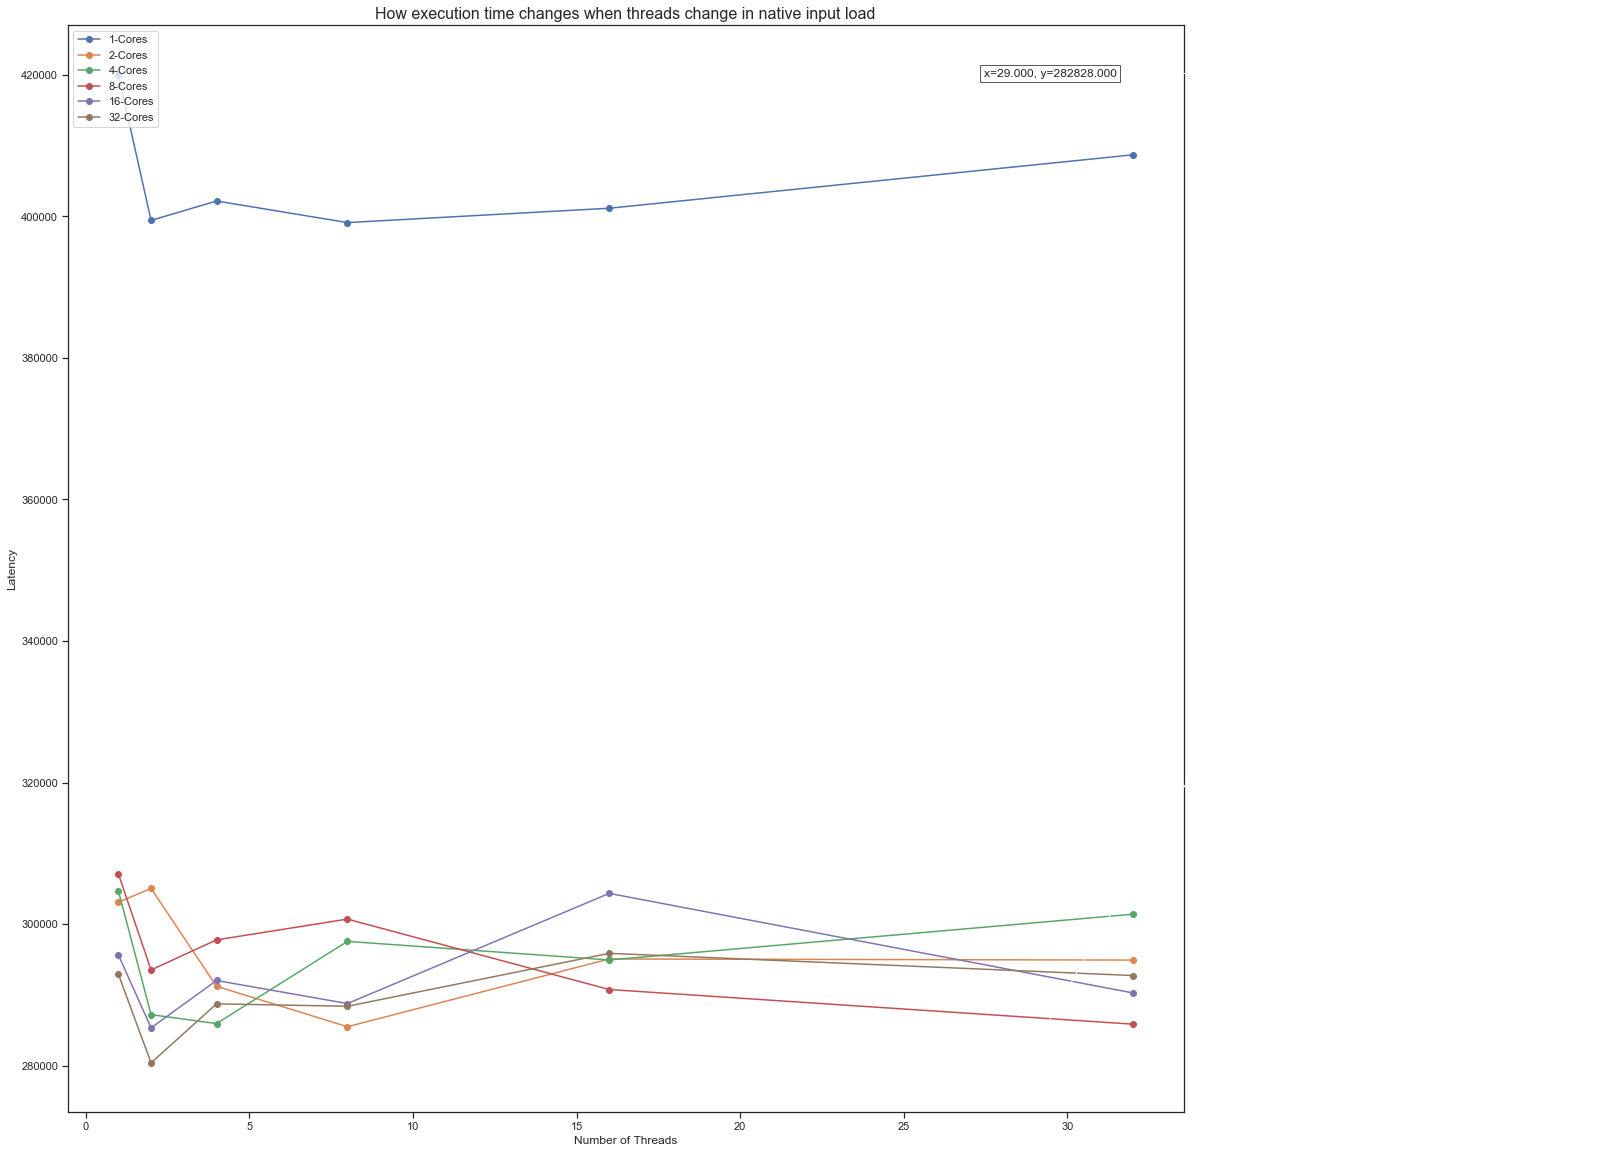

In [270]:
# Filtering for simdev
inputCombinationData = ferretPThreadData.loc[(ferretPThreadData['input'] == "native") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in native input load",'Number of Threads',"Latency",'cores')

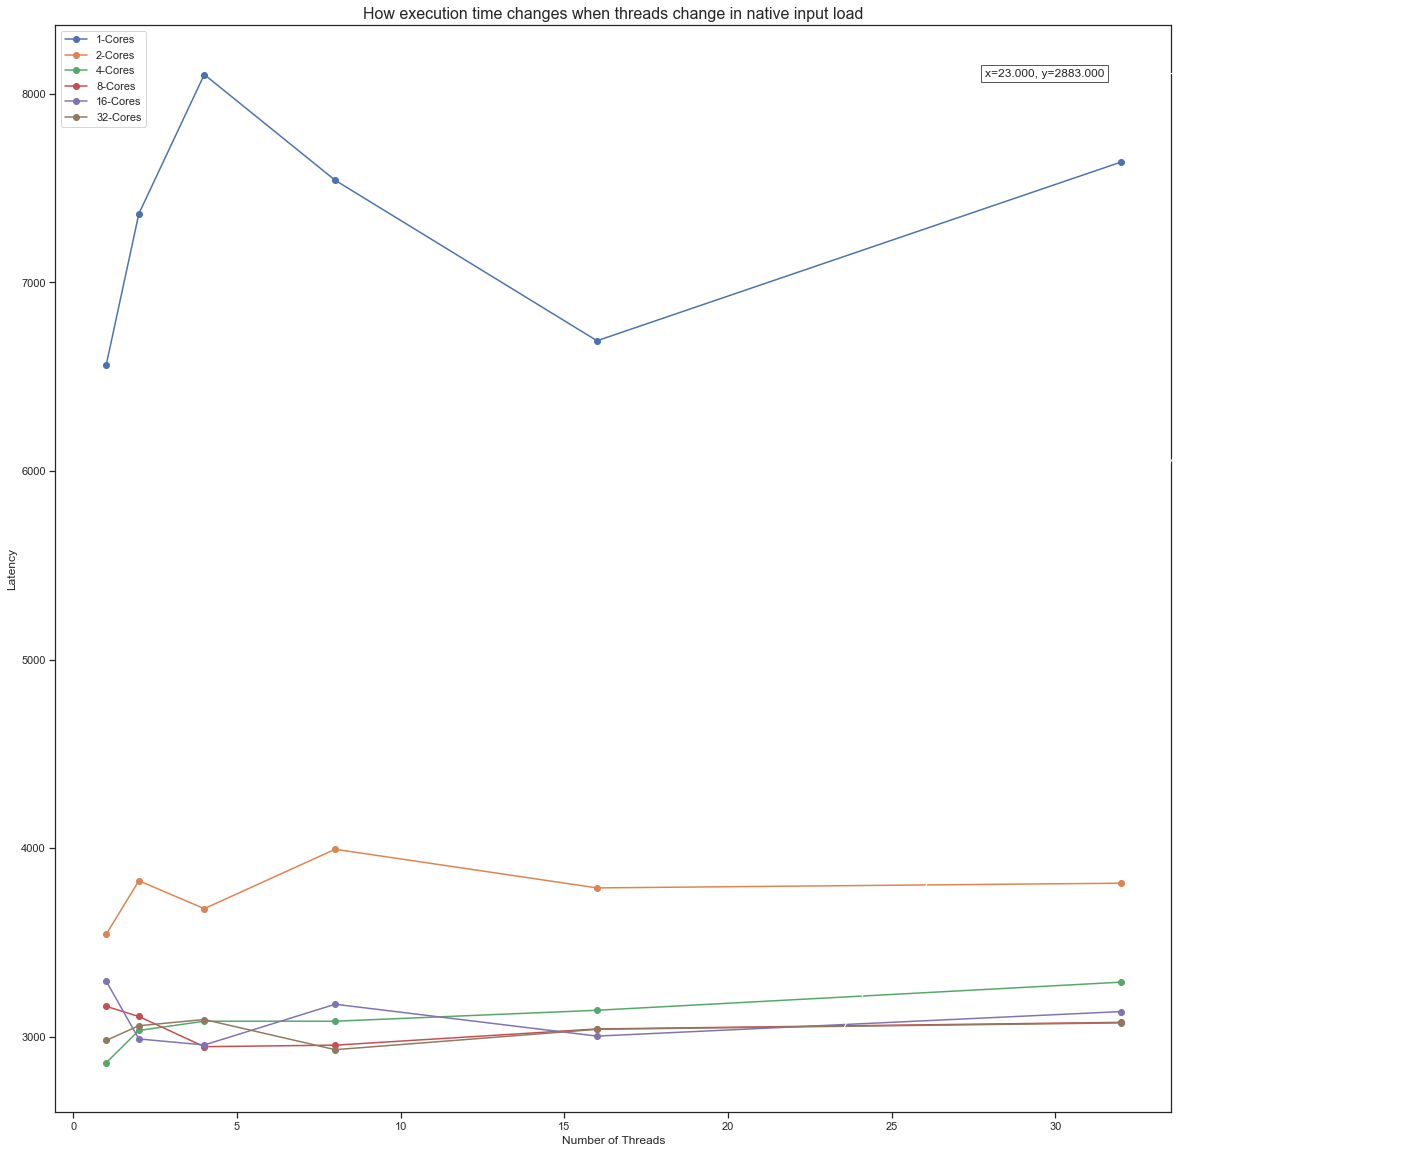

In [271]:
# Filtering for simdev
inputCombinationData = ferretPThreadData.loc[(ferretPThreadData['input'] == "simlarge") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in native input load",'Number of Threads',"Latency",'cores')

In [272]:
# gcc-tbb compiler configuration
ferretTBBData =ferretData.loc[ferretData['compiler'] == "gcc-tbb"]

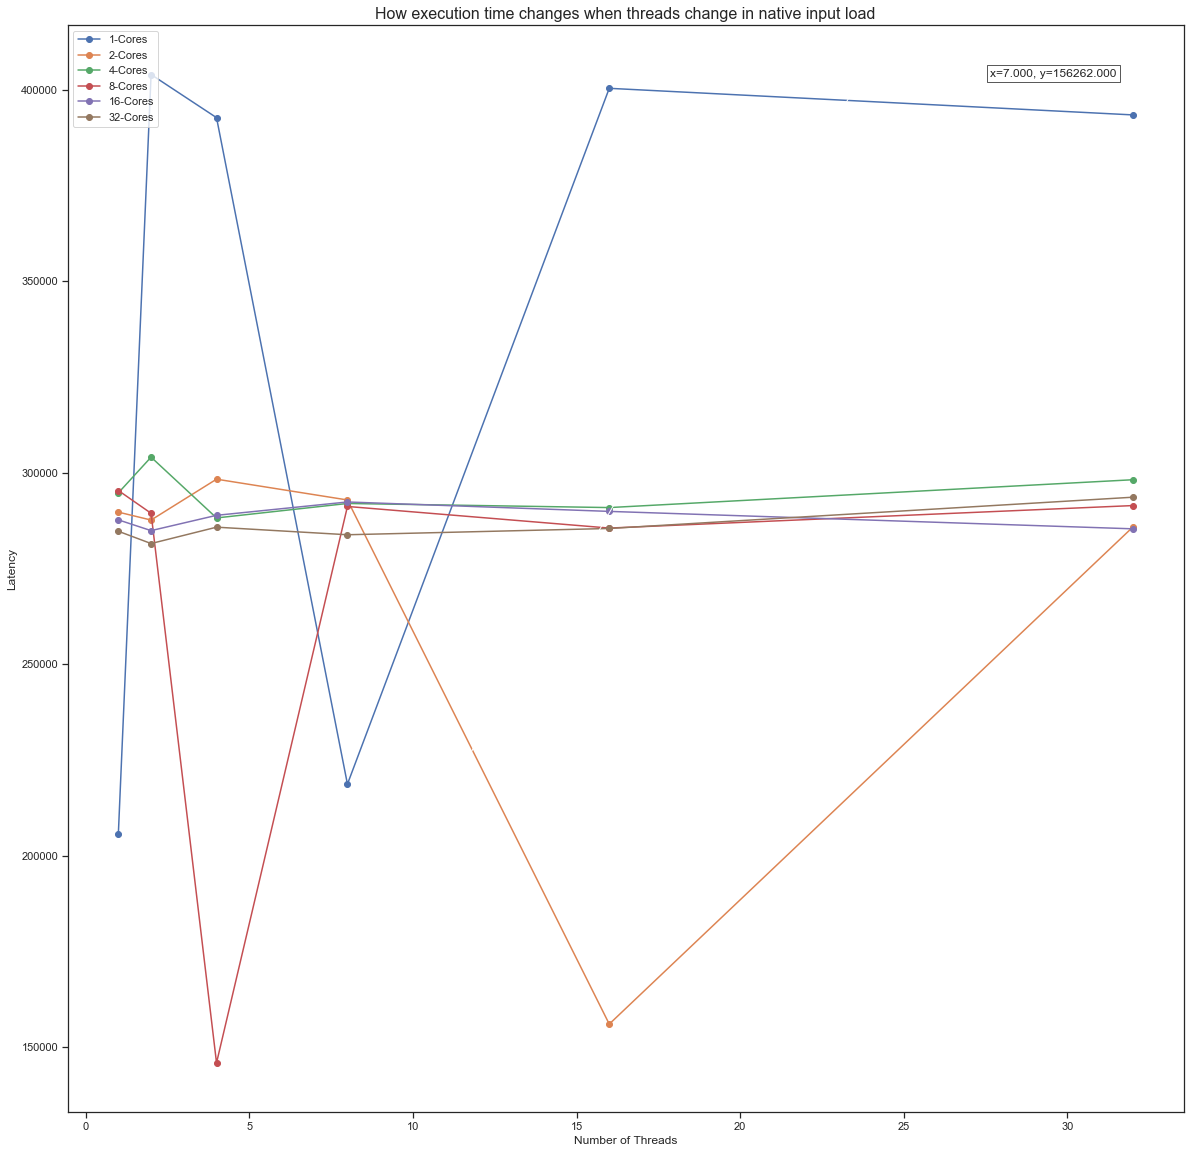

In [274]:
# Filtering for simdev
inputCombinationData = ferretTBBData.loc[(ferretTBBData['input'] == "native") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in native input load",'Number of Threads',"Latency",'cores')

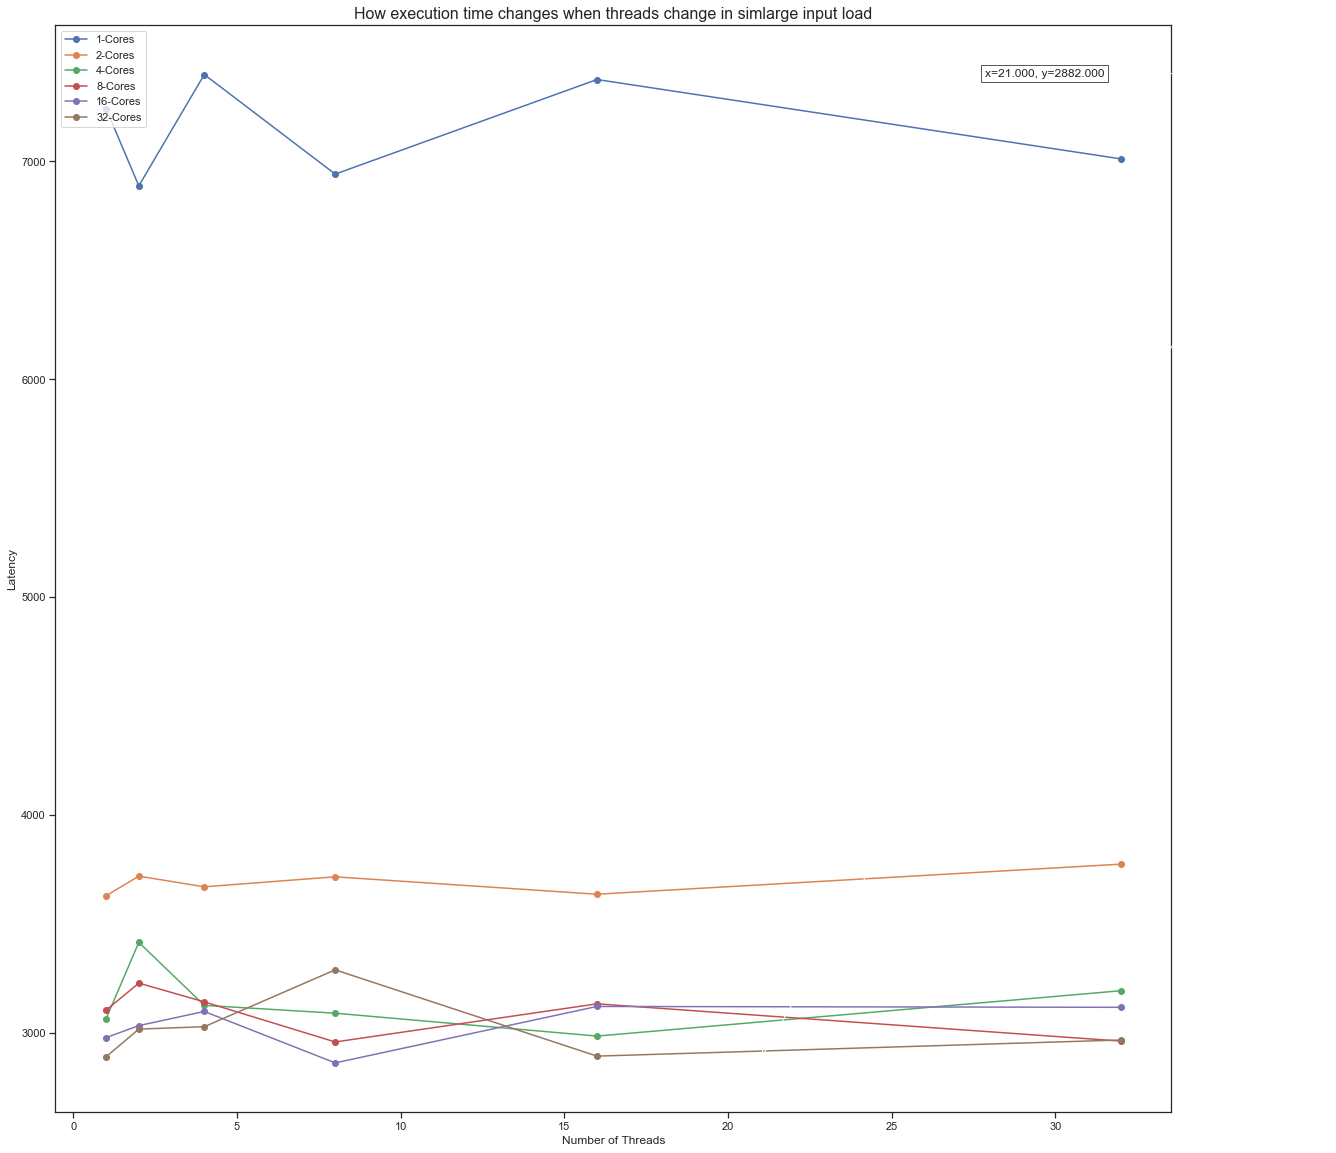

In [275]:
# Filtering for simdev
inputCombinationData = ferretTBBData.loc[(ferretTBBData['input'] == "simlarge") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in simlarge input load",'Number of Threads',"Latency",'cores')

### Dedup Analysis

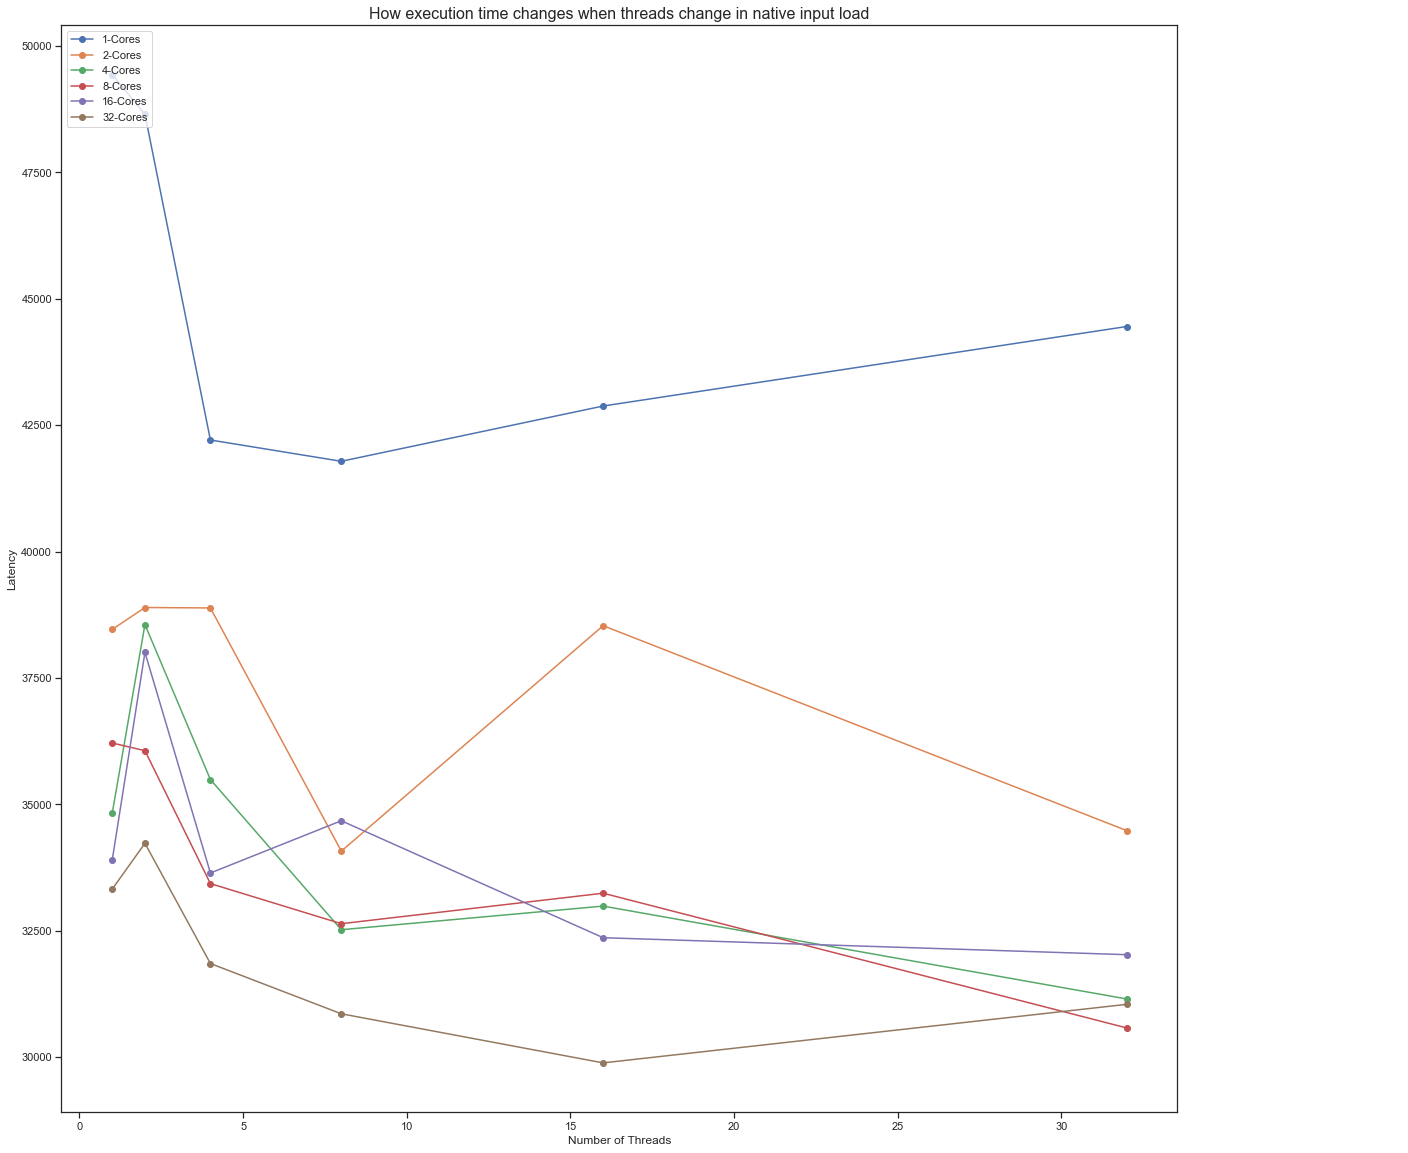

In [277]:
# Filtering for native
inputCombinationData = dedupData.loc[(dedupData['input'] == "native") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in native input load",'Number of Threads',"Latency",'cores')

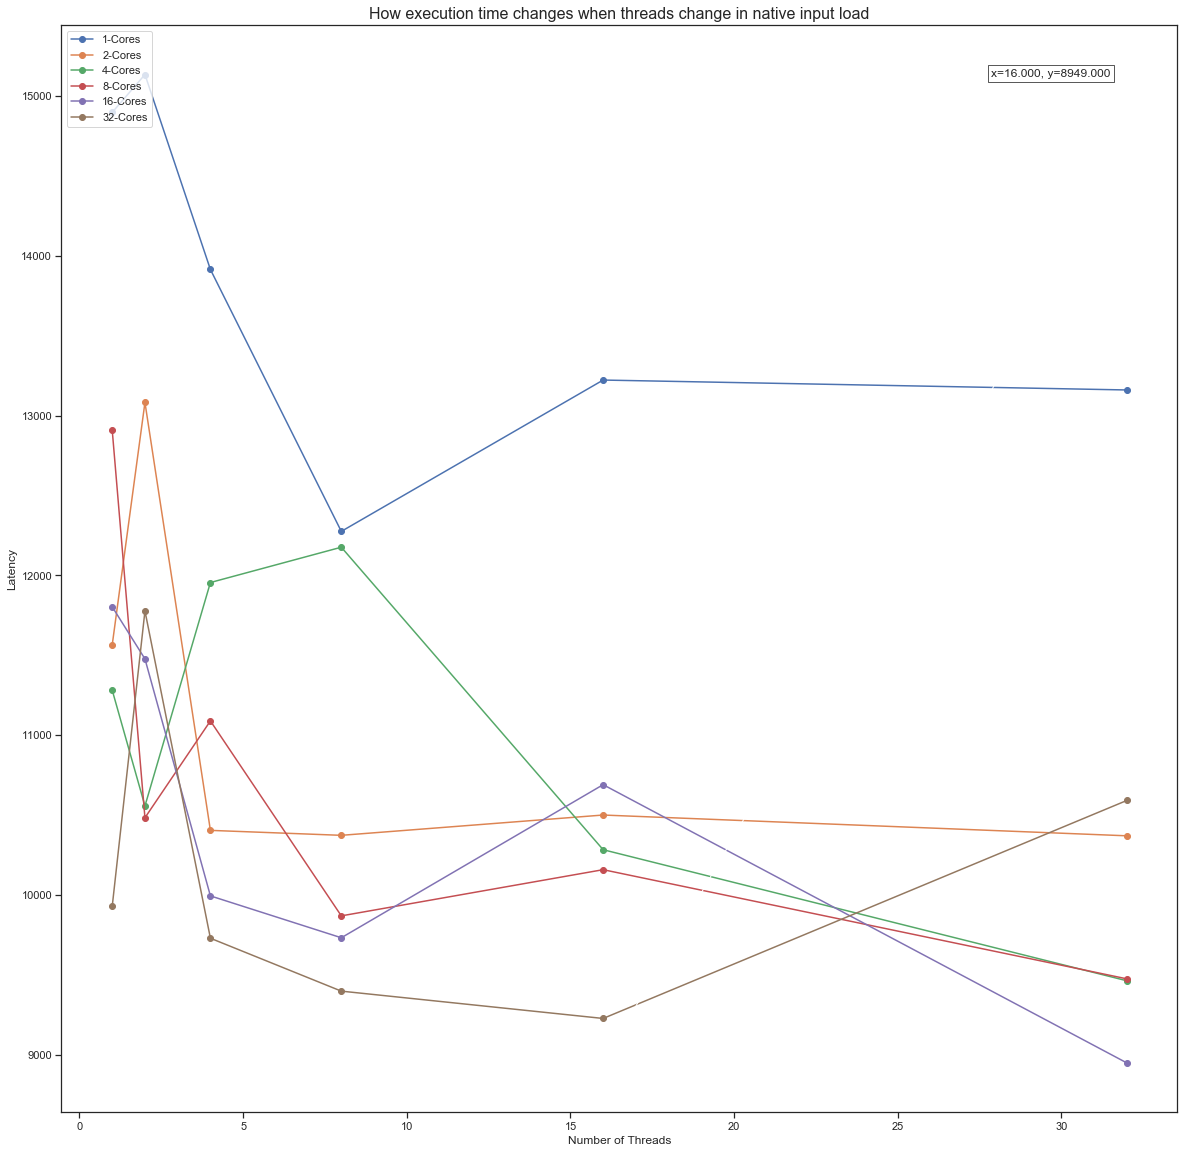

In [278]:
# Filtering for native
inputCombinationData = dedupData.loc[(dedupData['input'] == "simlarge") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in native input load",'Number of Threads',"Latency",'cores')

### x264 Analysis

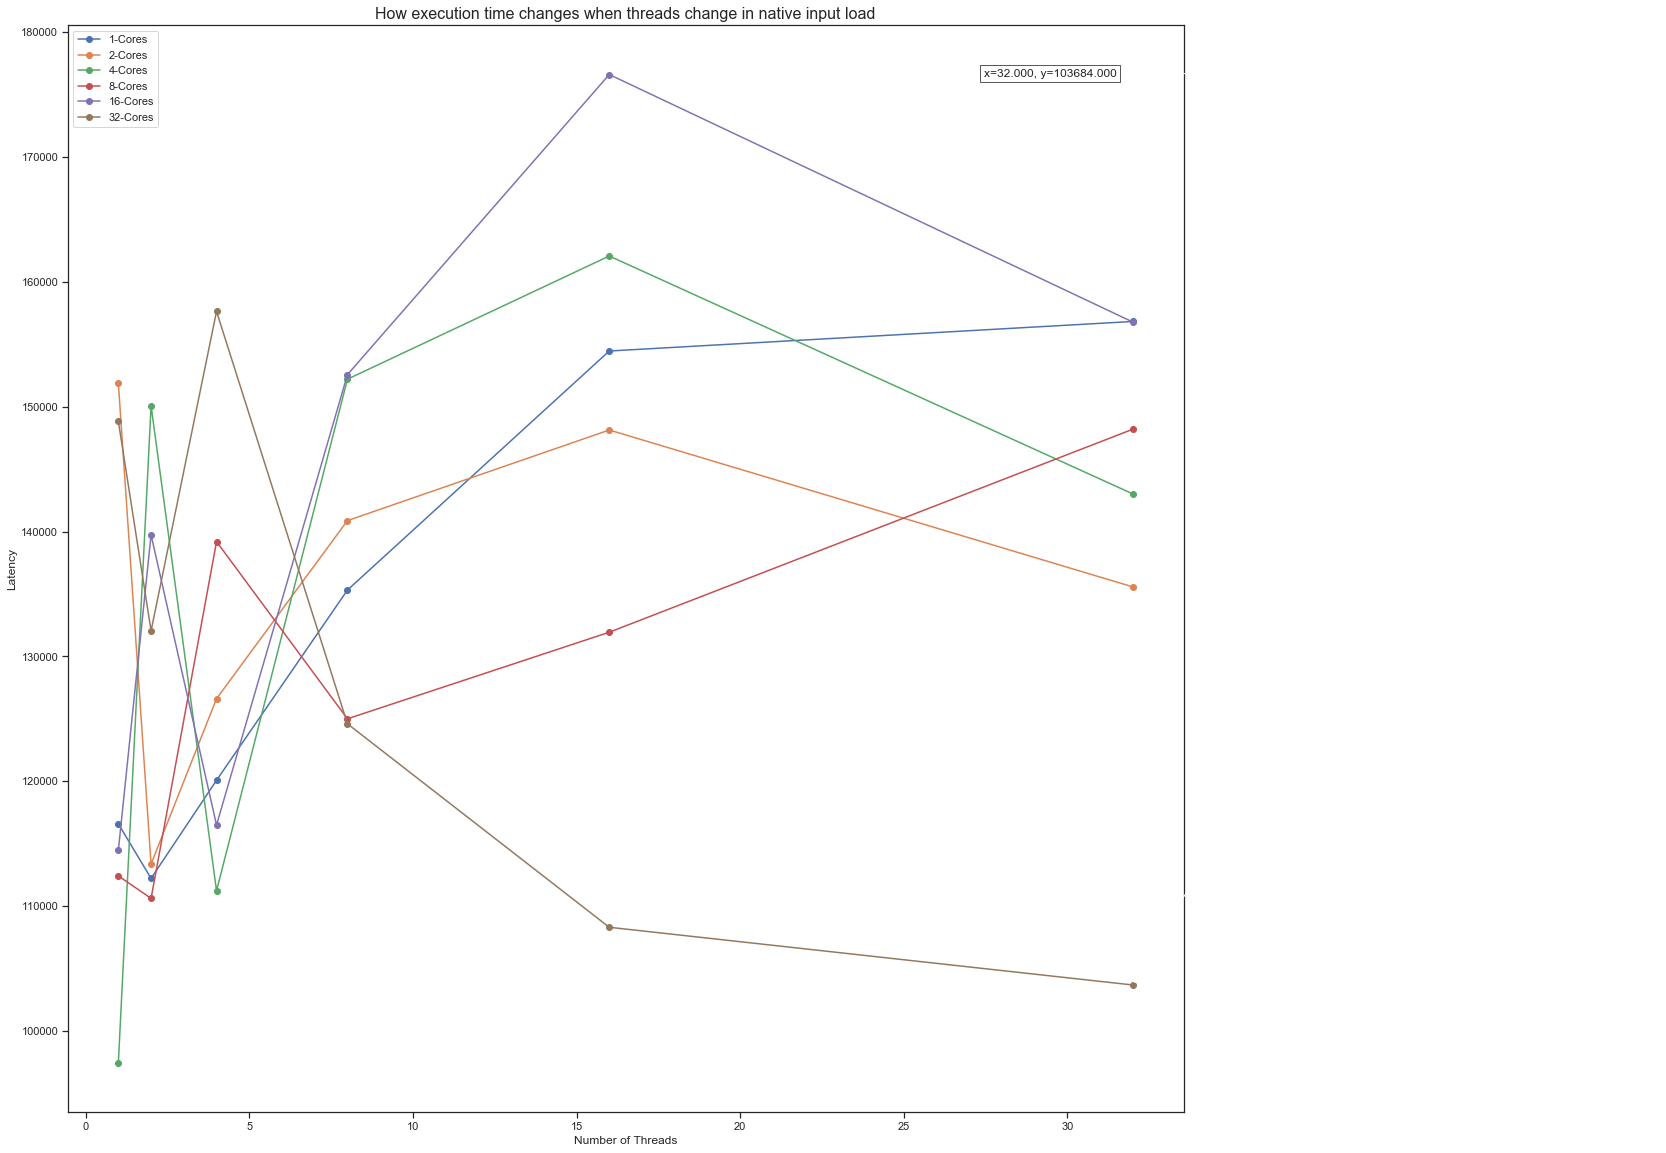

In [280]:
# Filtering for native
inputCombinationData = x264Data.loc[(x264Data['input'] == "native") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in native input load",'Number of Threads',"Latency",'cores')

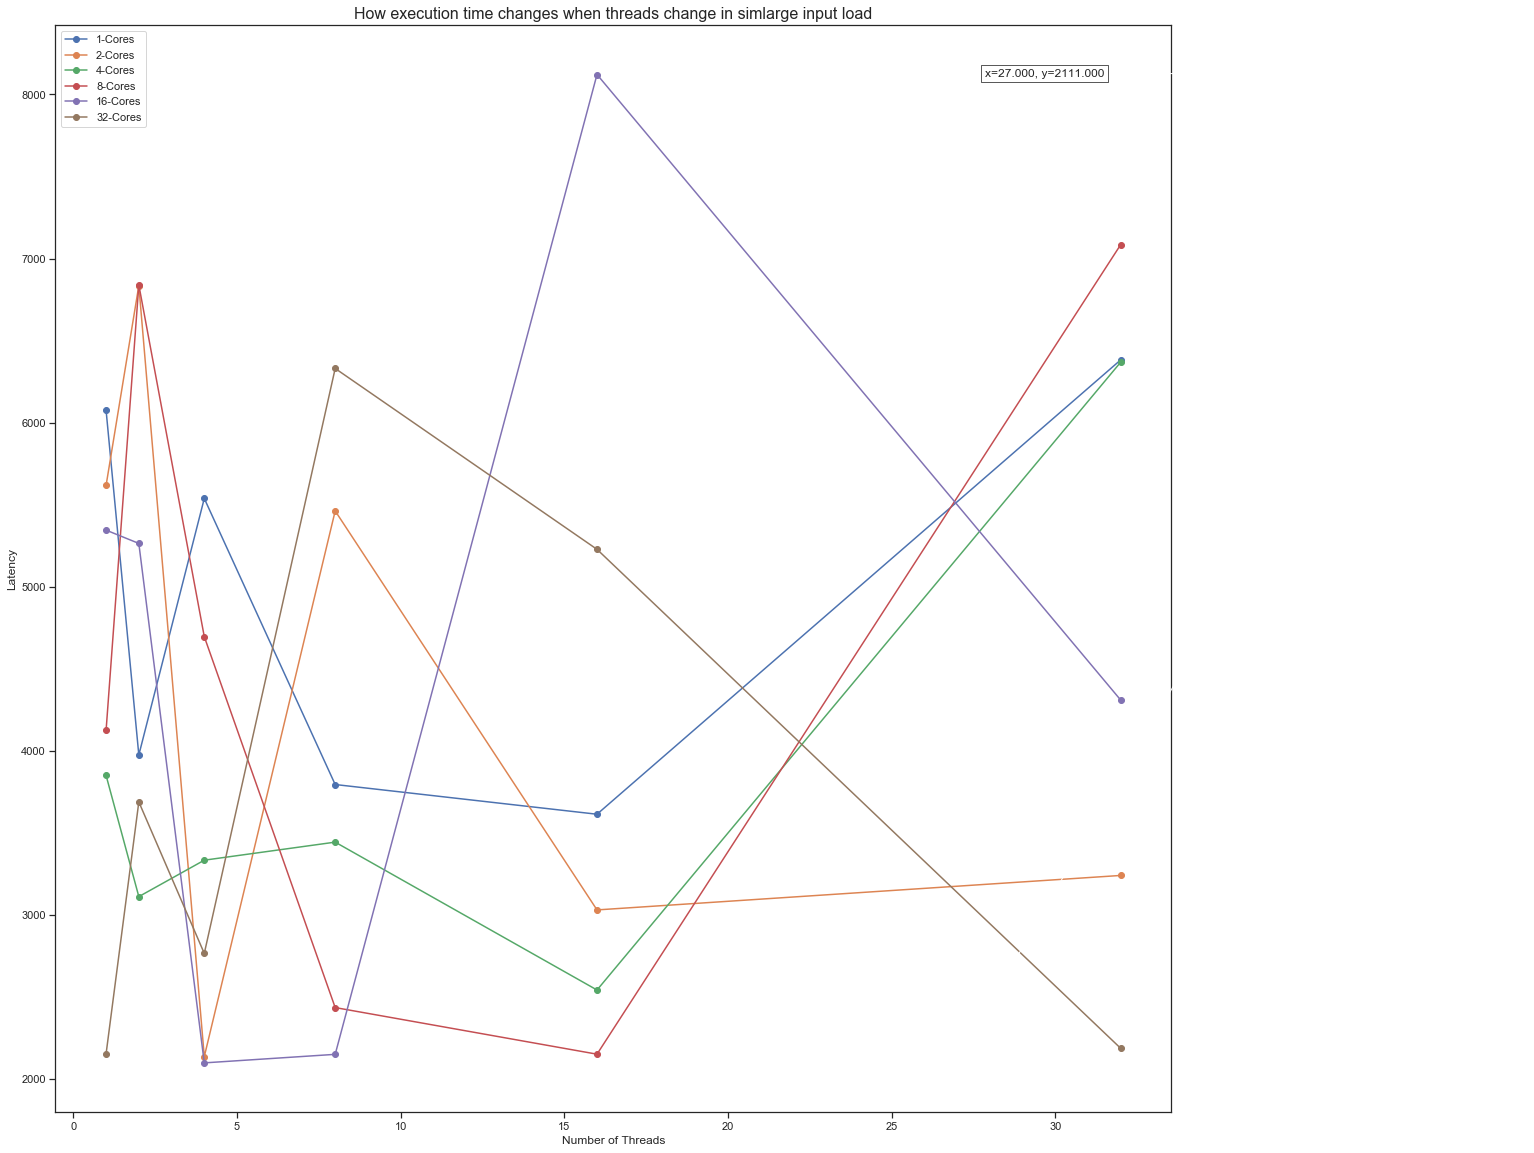

In [281]:
# Filtering for native
inputCombinationData = x264Data.loc[(x264Data['input'] == "simlarge") ]
drawChartForInputs(threadCombinations,inputCombinationData,axs,plt_coresCombinations,'Cores',"How execution time changes when threads change in simlarge input load",'Number of Threads',"Latency",'cores')

## Analysis with cores and execution time for different number of threads

### Ferret Analysis

In [244]:
# phtread version
ferretPThreadData =ferretData.loc[ferretData['compiler'] == "gcc-pthreads"]


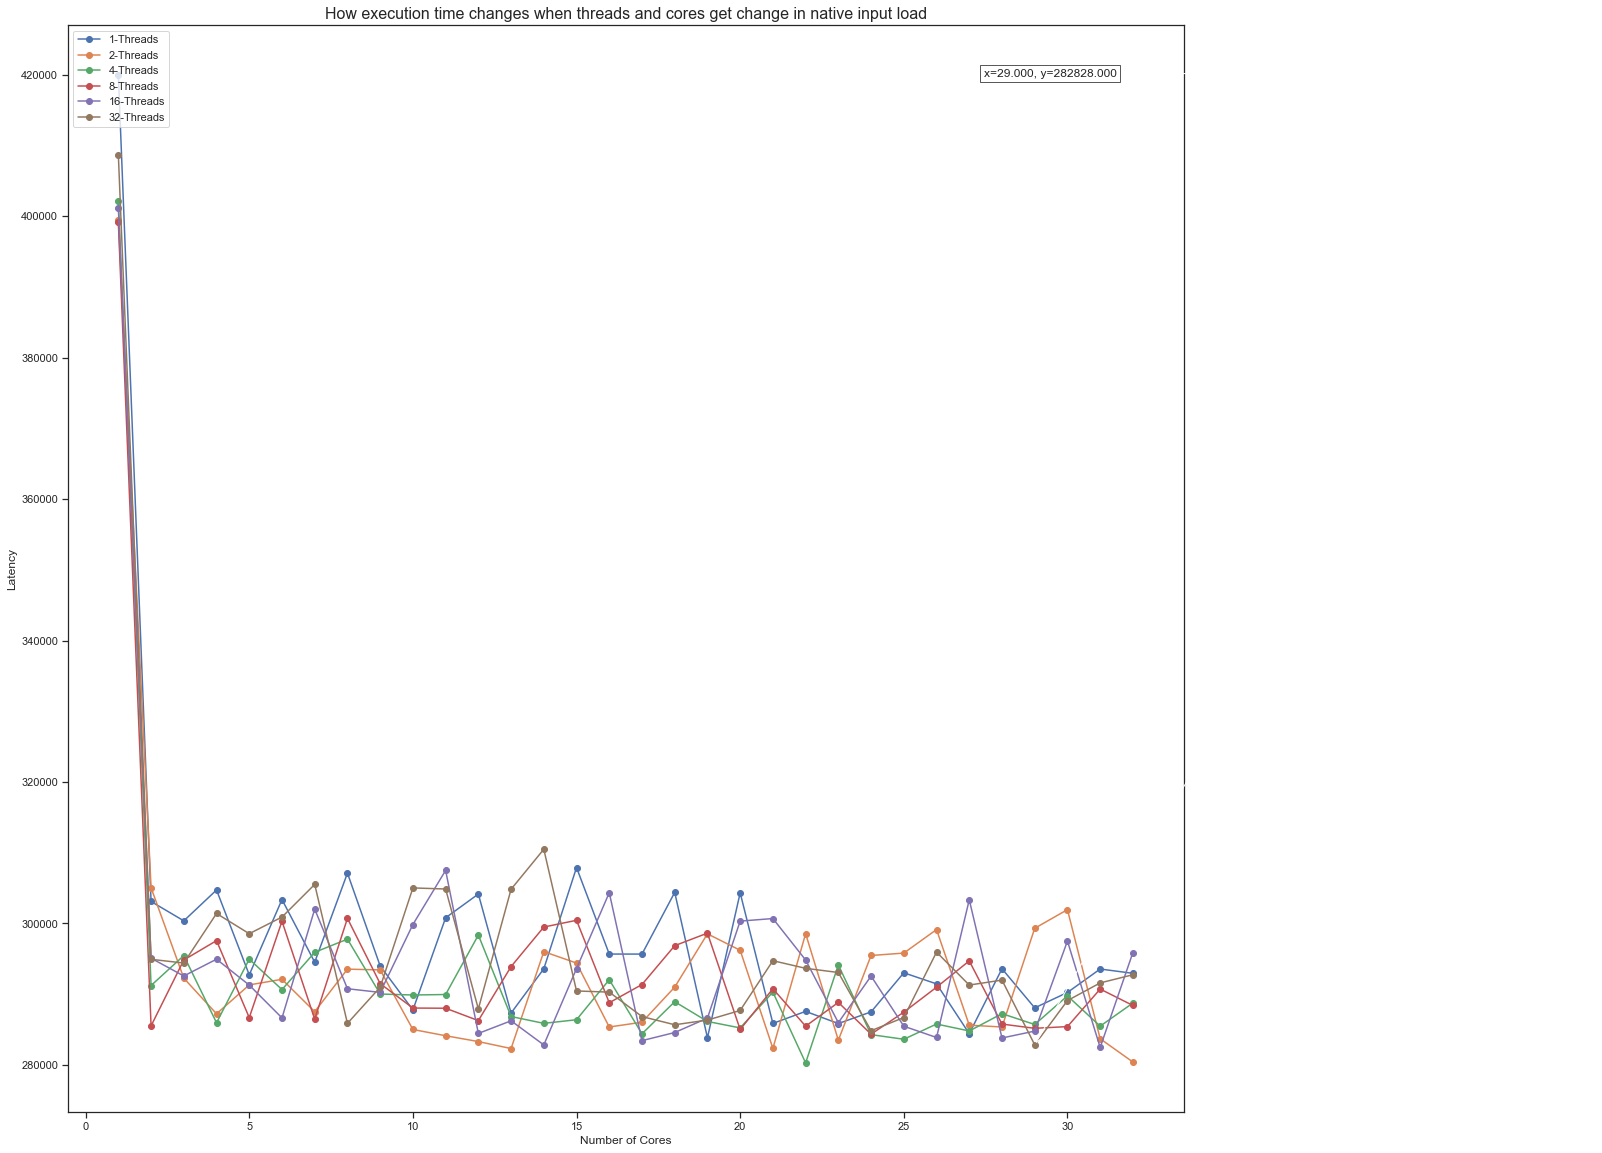

In [245]:
# Filtering for simdev
inputCombinationData = ferretPThreadData.loc[(ferretPThreadData['input'] == "native") ]
drawChartForInputs(coresCombinations,inputCombinationData,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change in native input load",'Number of Cores',"Latency")

<Figure size 1440x1440 with 0 Axes>

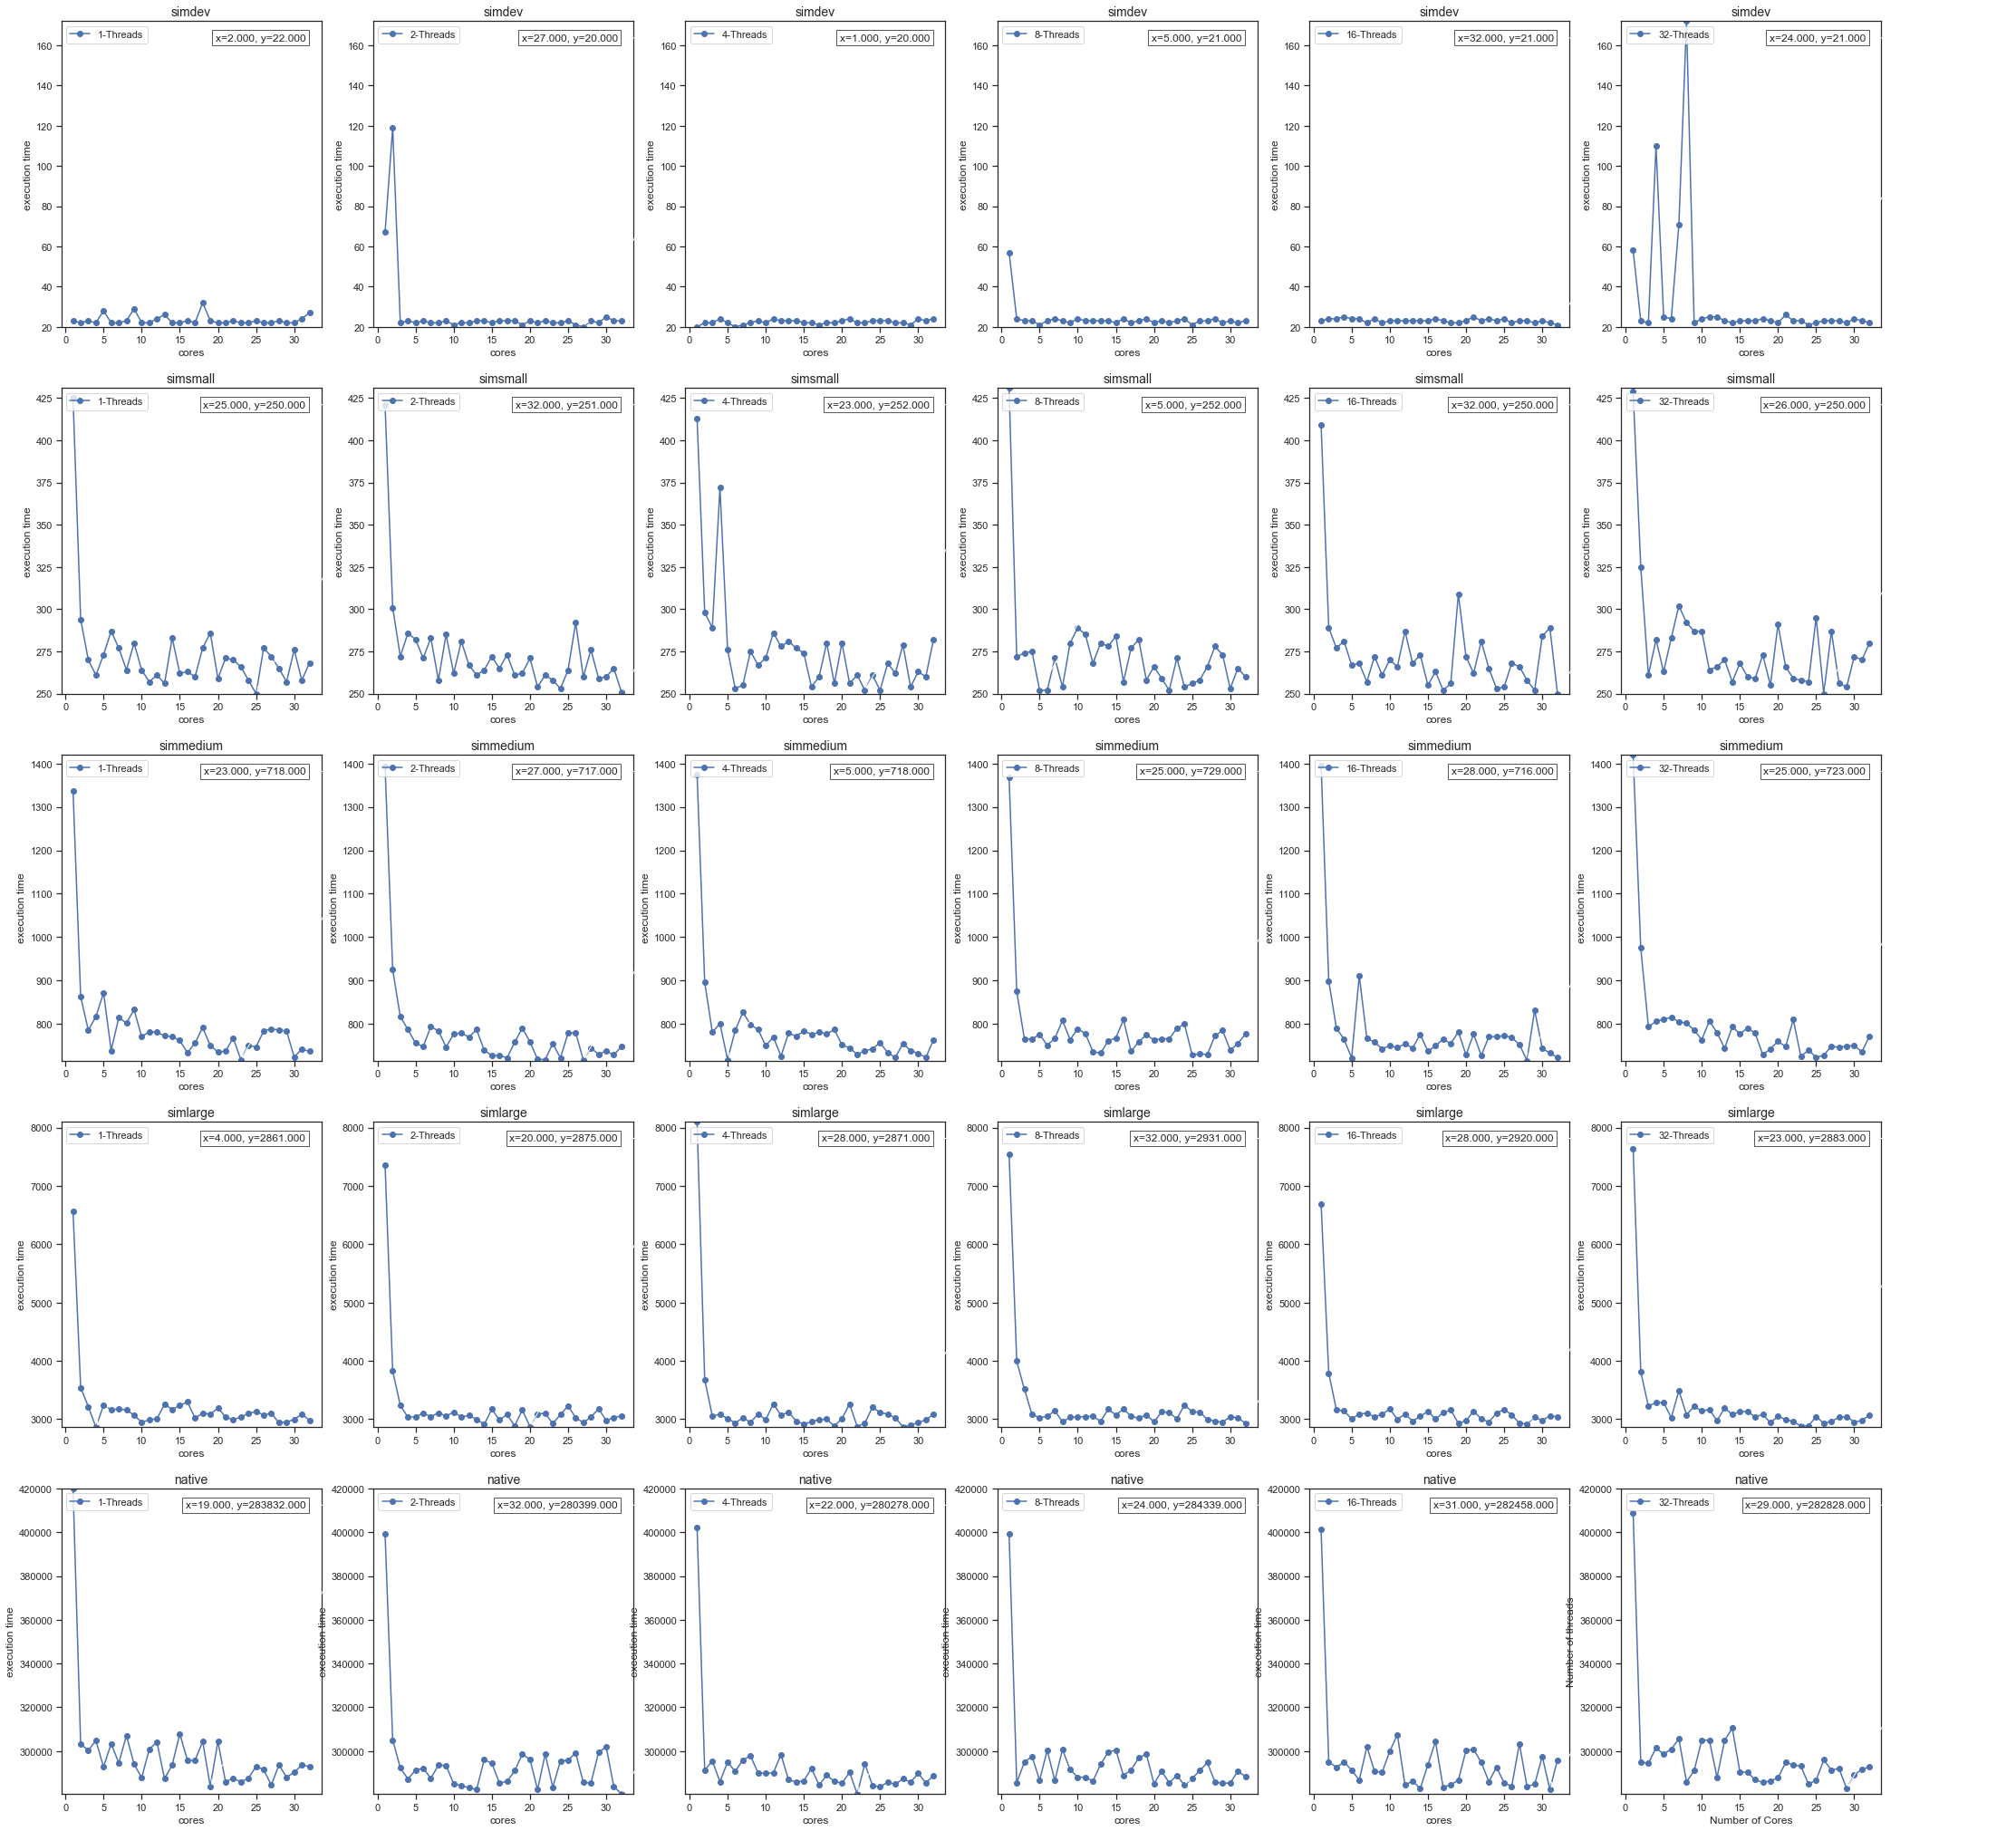

In [246]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))
drawMatrixChartForInputs(coresCombinations,ferretPThreadData,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")

In [247]:
# gcc-tbb compiler configuration
ferretTBBData =ferretData.loc[ferretData['compiler'] == "gcc-tbb"]

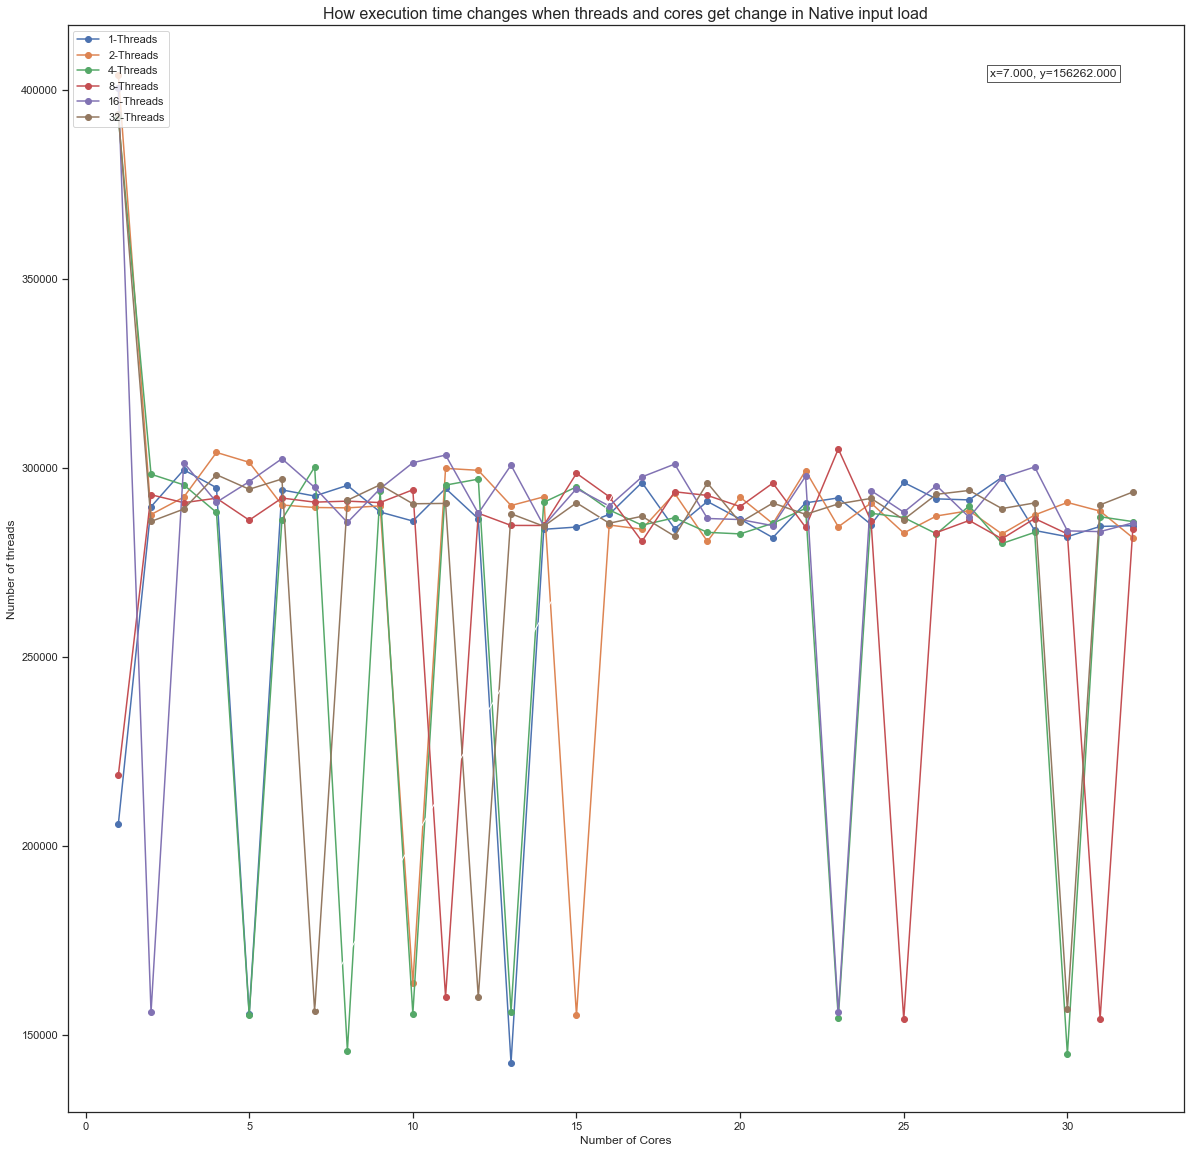

In [248]:
# Filtering for simdev
inputCombinationData = ferretTBBData.loc[(ferretTBBData['input'] == "native") ]

drawChartForInputs(coresCombinations,inputCombinationData,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change in Native input load",'Number of Cores',"Number of threads")

<Figure size 1440x1440 with 0 Axes>

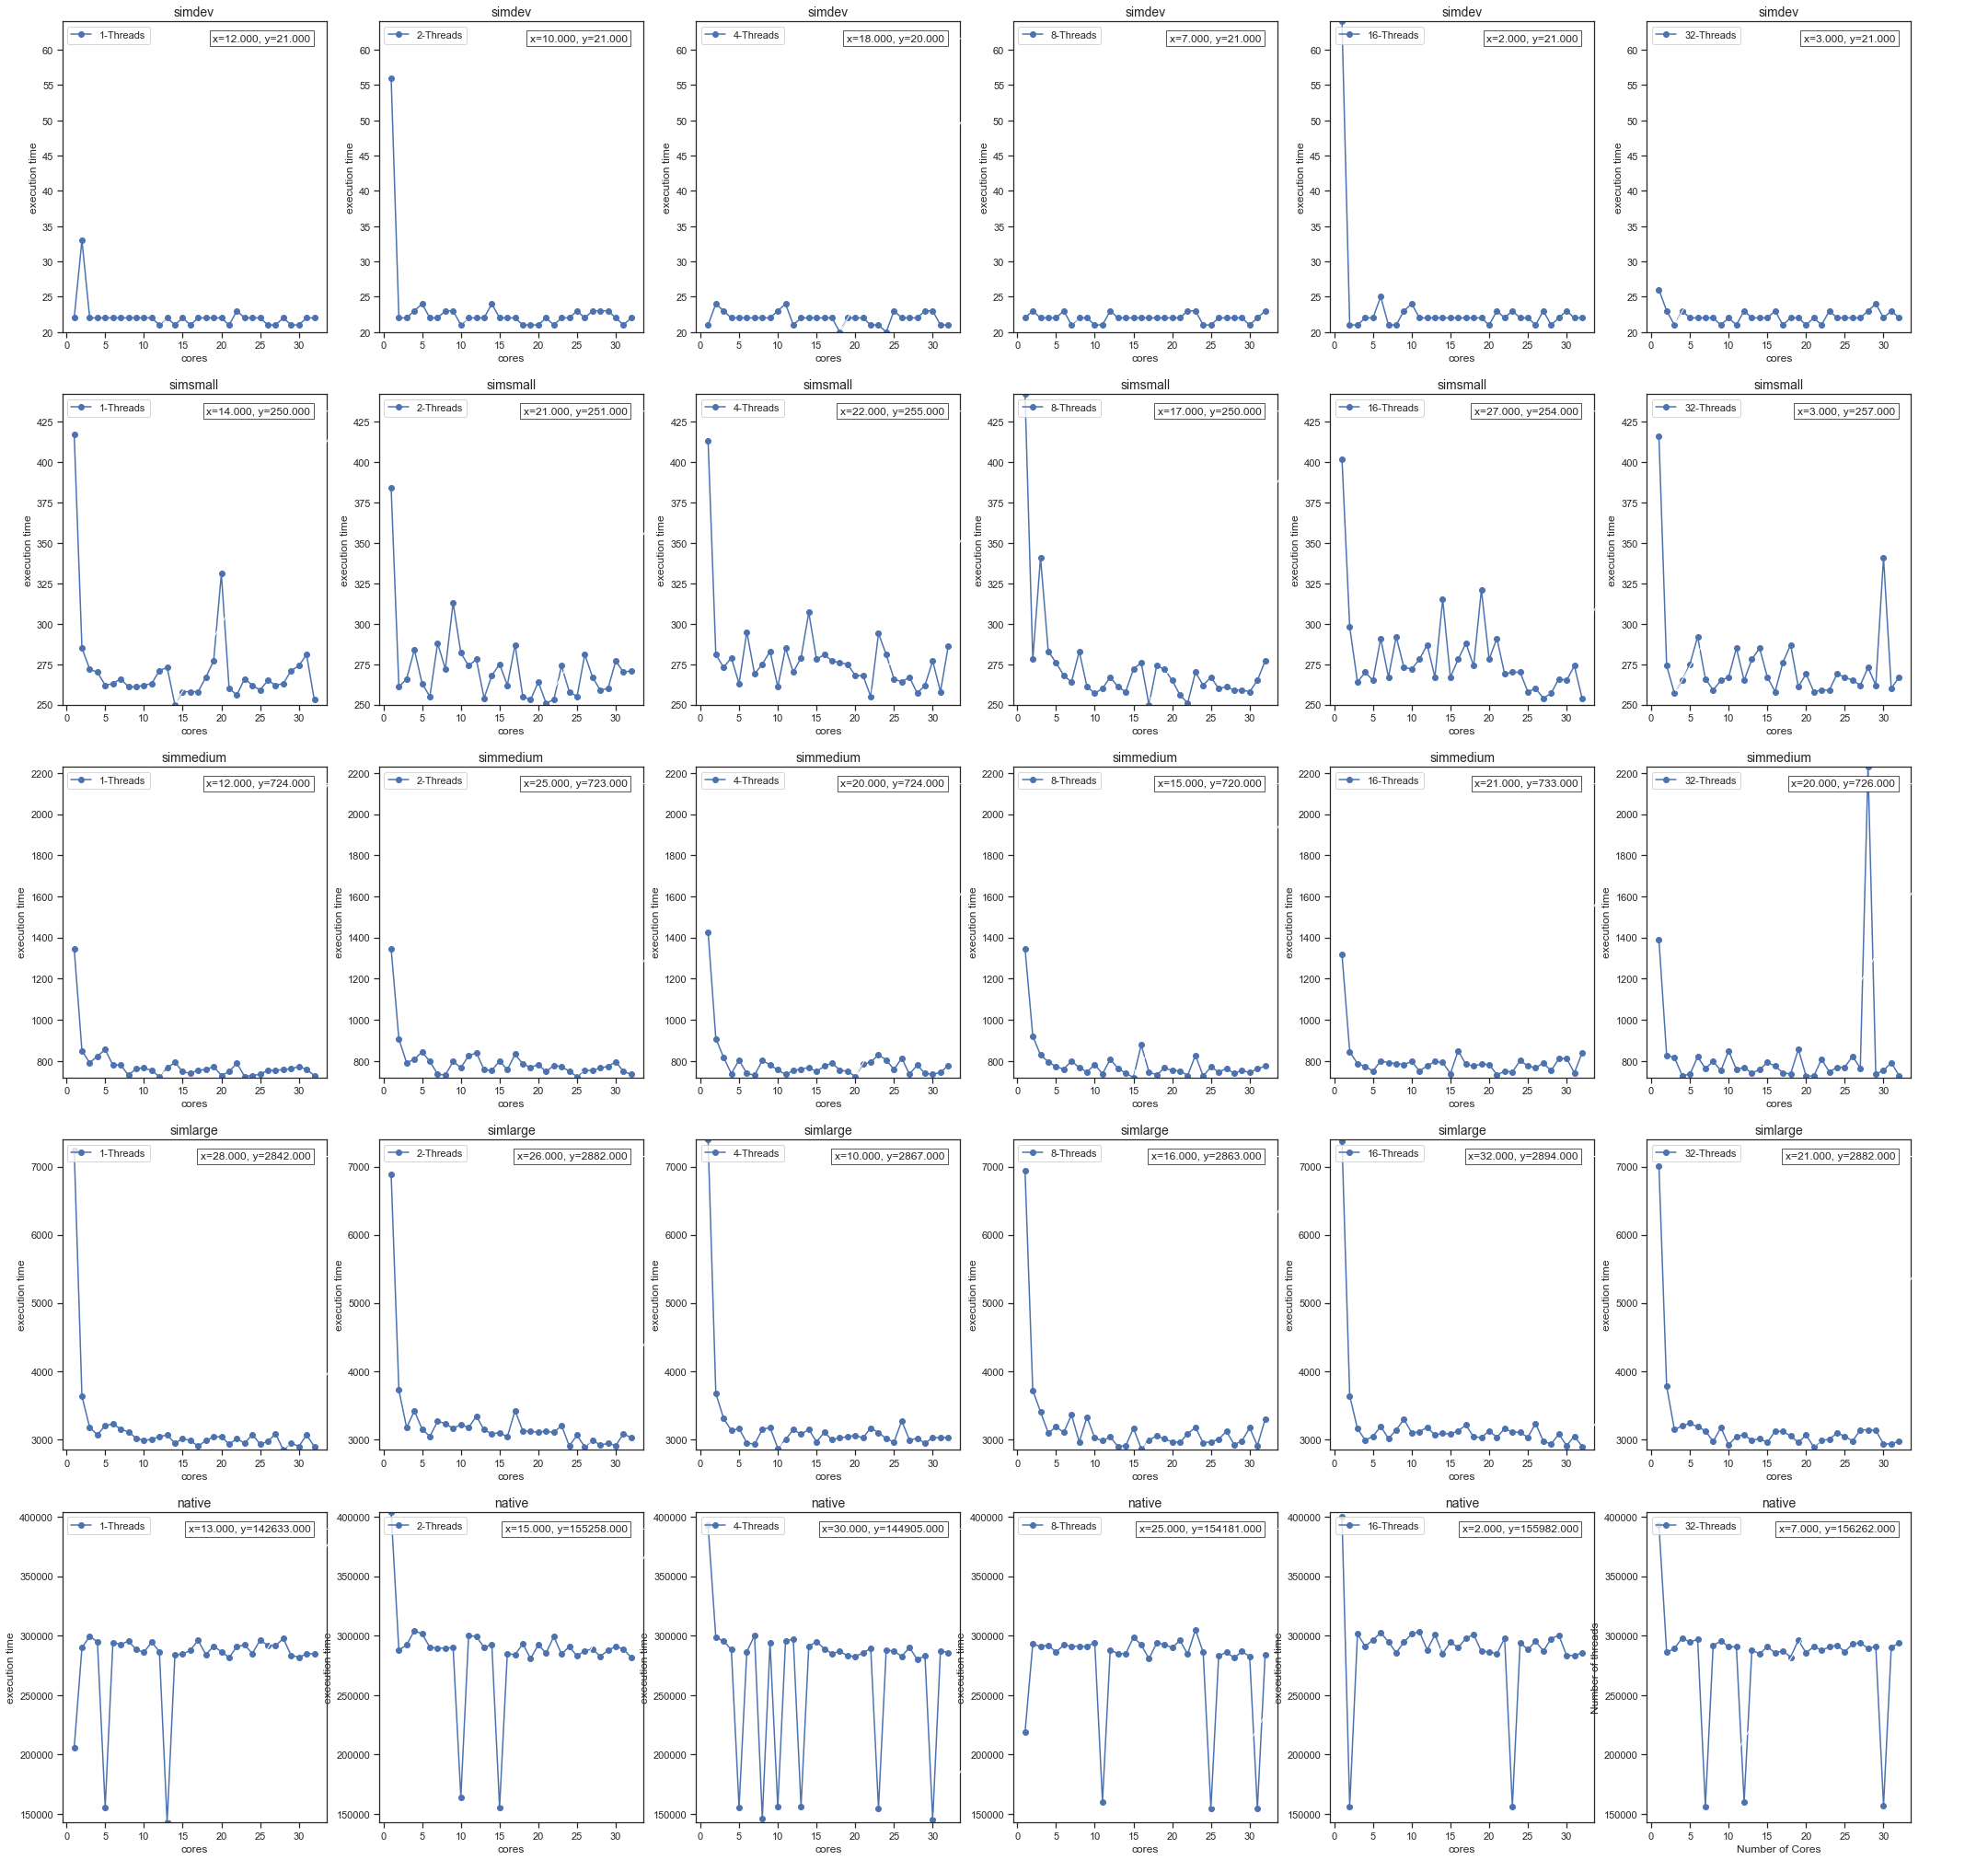

In [249]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))
drawMatrixChartForInputs(coresCombinations,ferretTBBData,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")

# Dedup Analysis

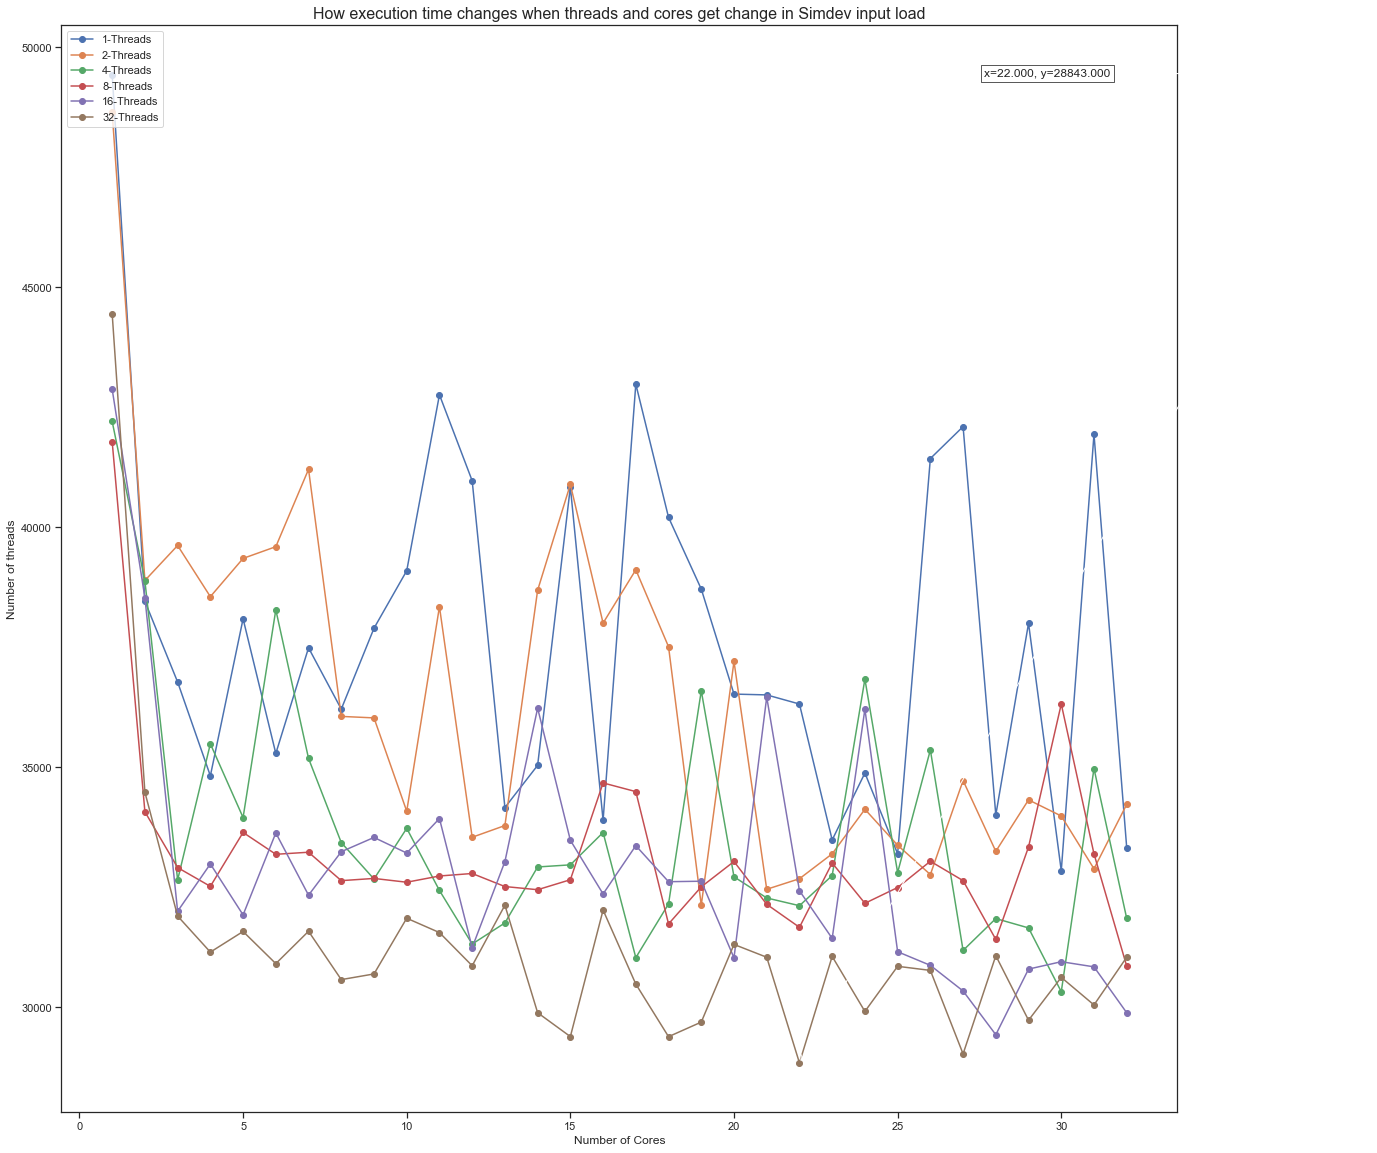

In [250]:
# Filtering for native
inputCombinationData = dedupData.loc[(dedupData['input'] == "native") ]
drawChartForInputs(coresCombinations,inputCombinationData,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change in Simdev input load",'Number of Cores',"Number of threads")

<Figure size 1440x1440 with 0 Axes>

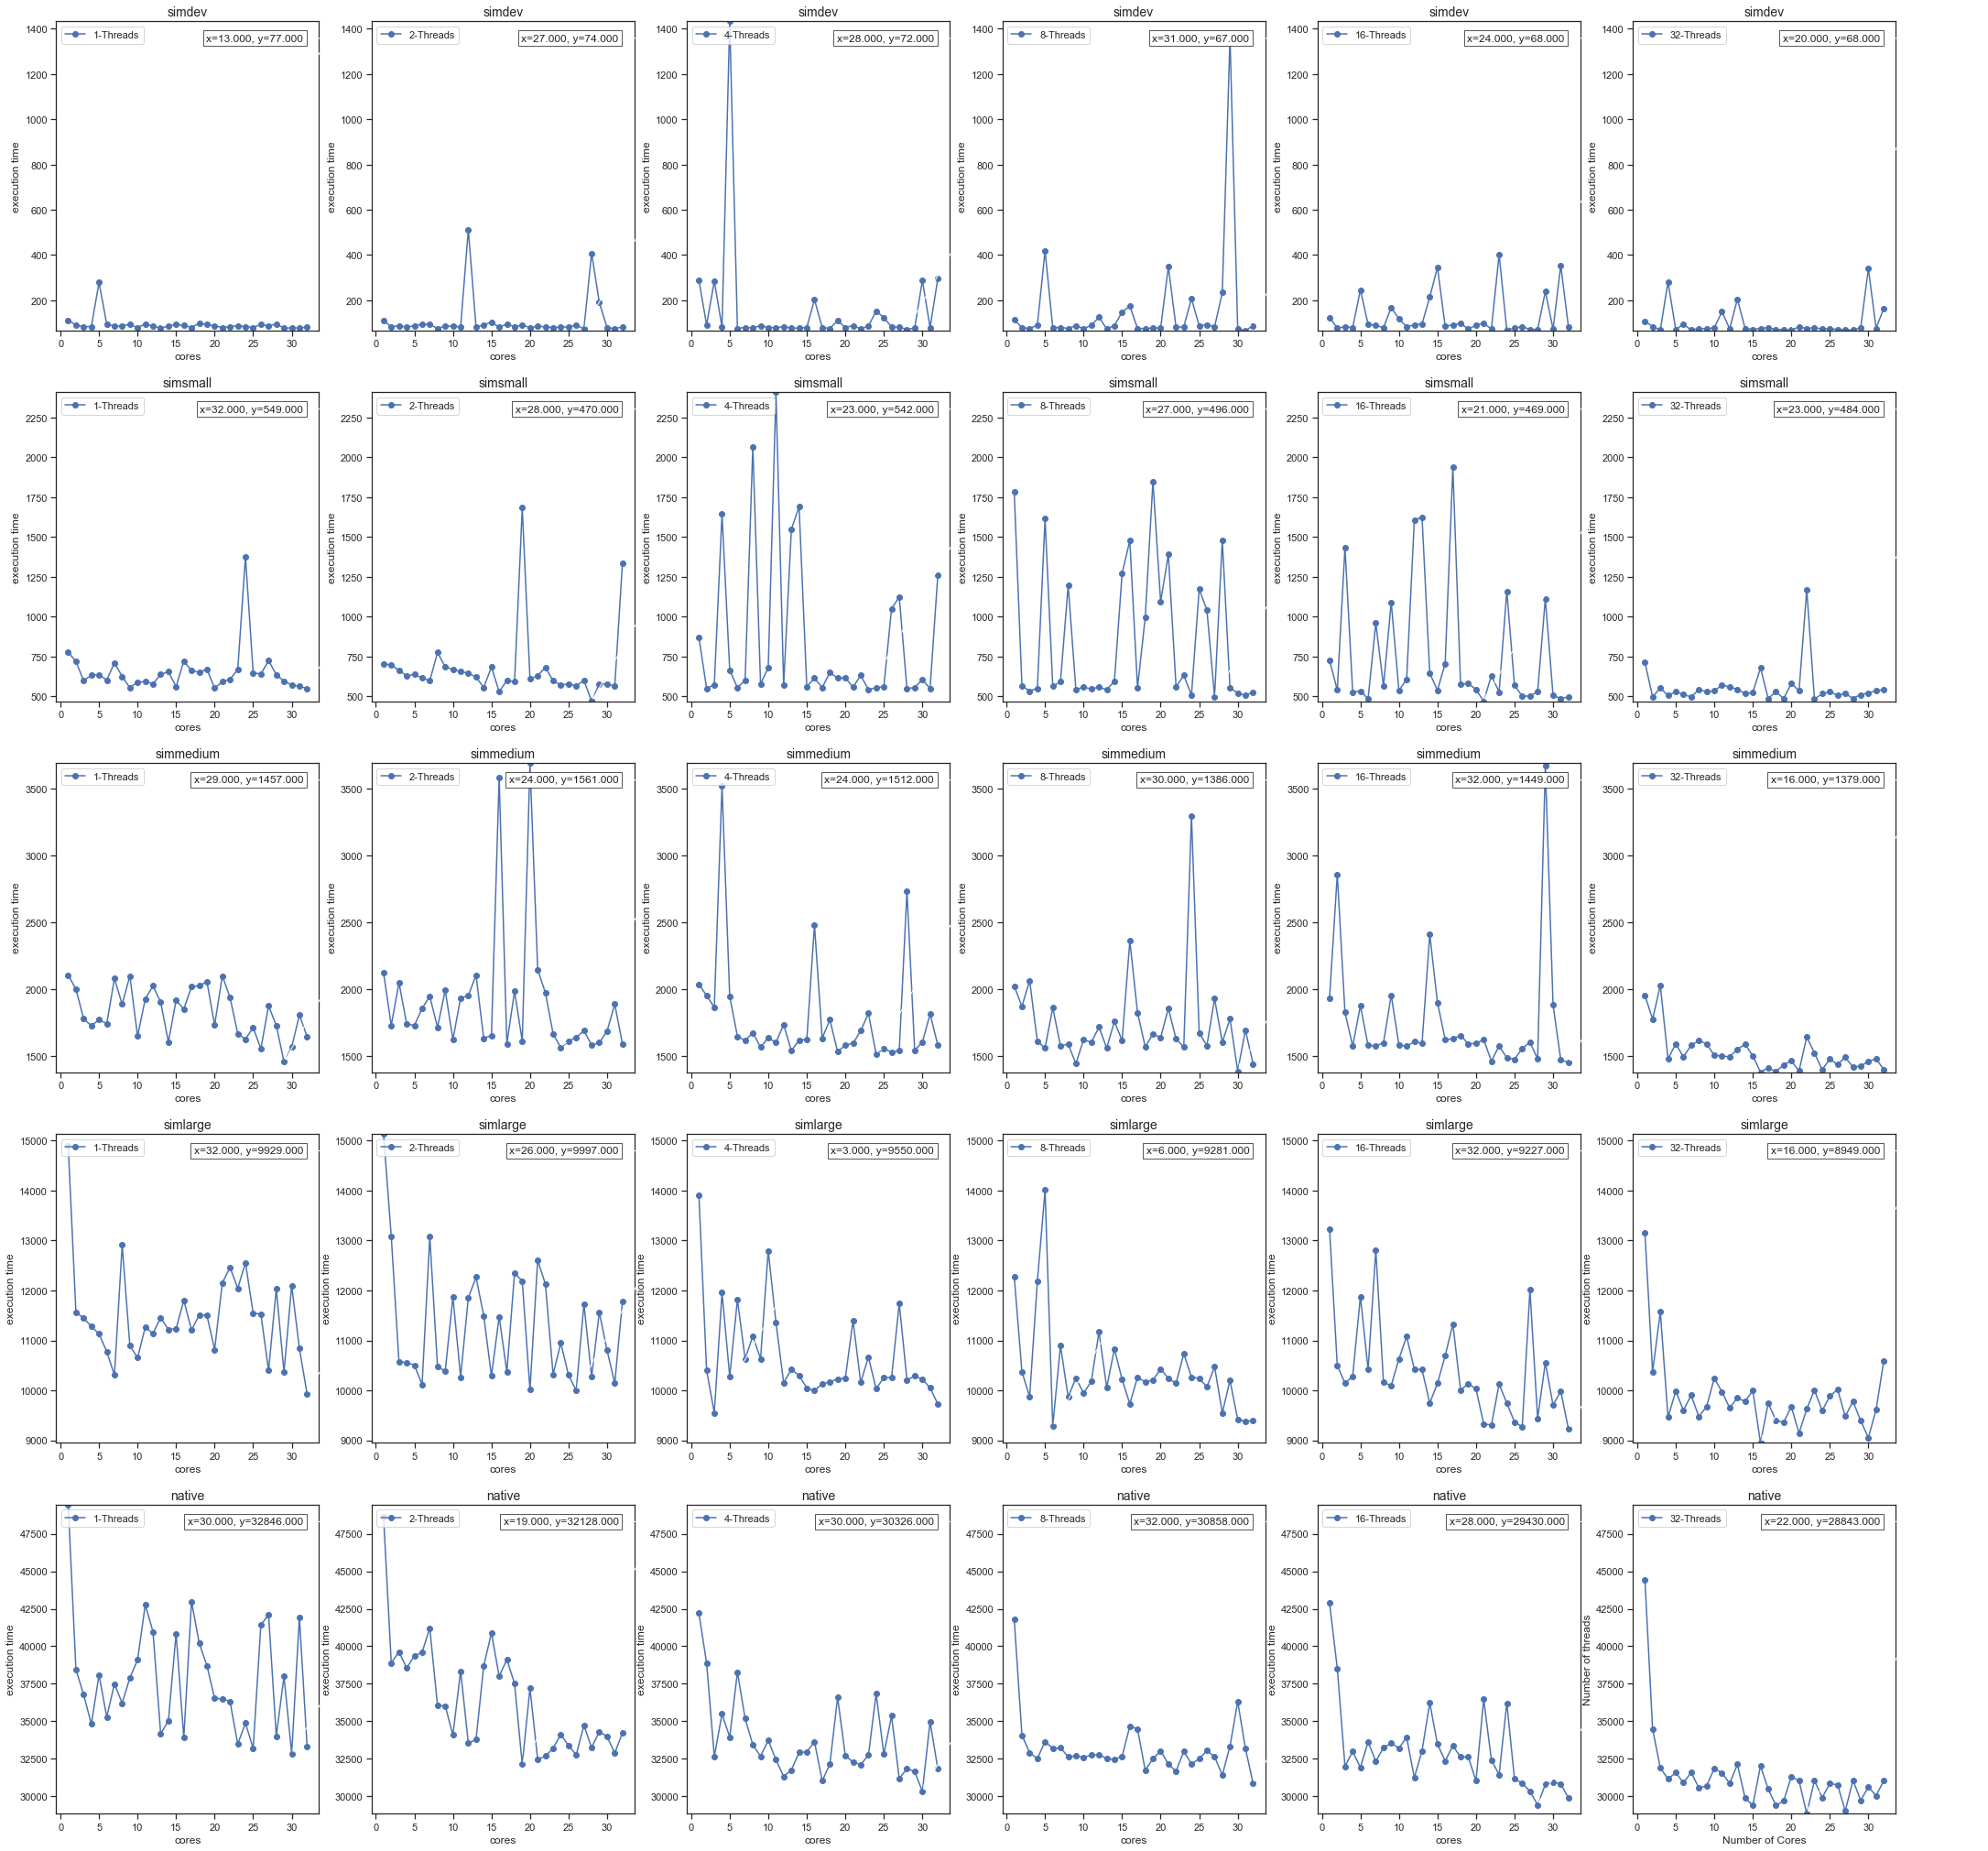

In [251]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))
drawMatrixChartForInputs(coresCombinations,dedupData,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")

# x264 Analysis

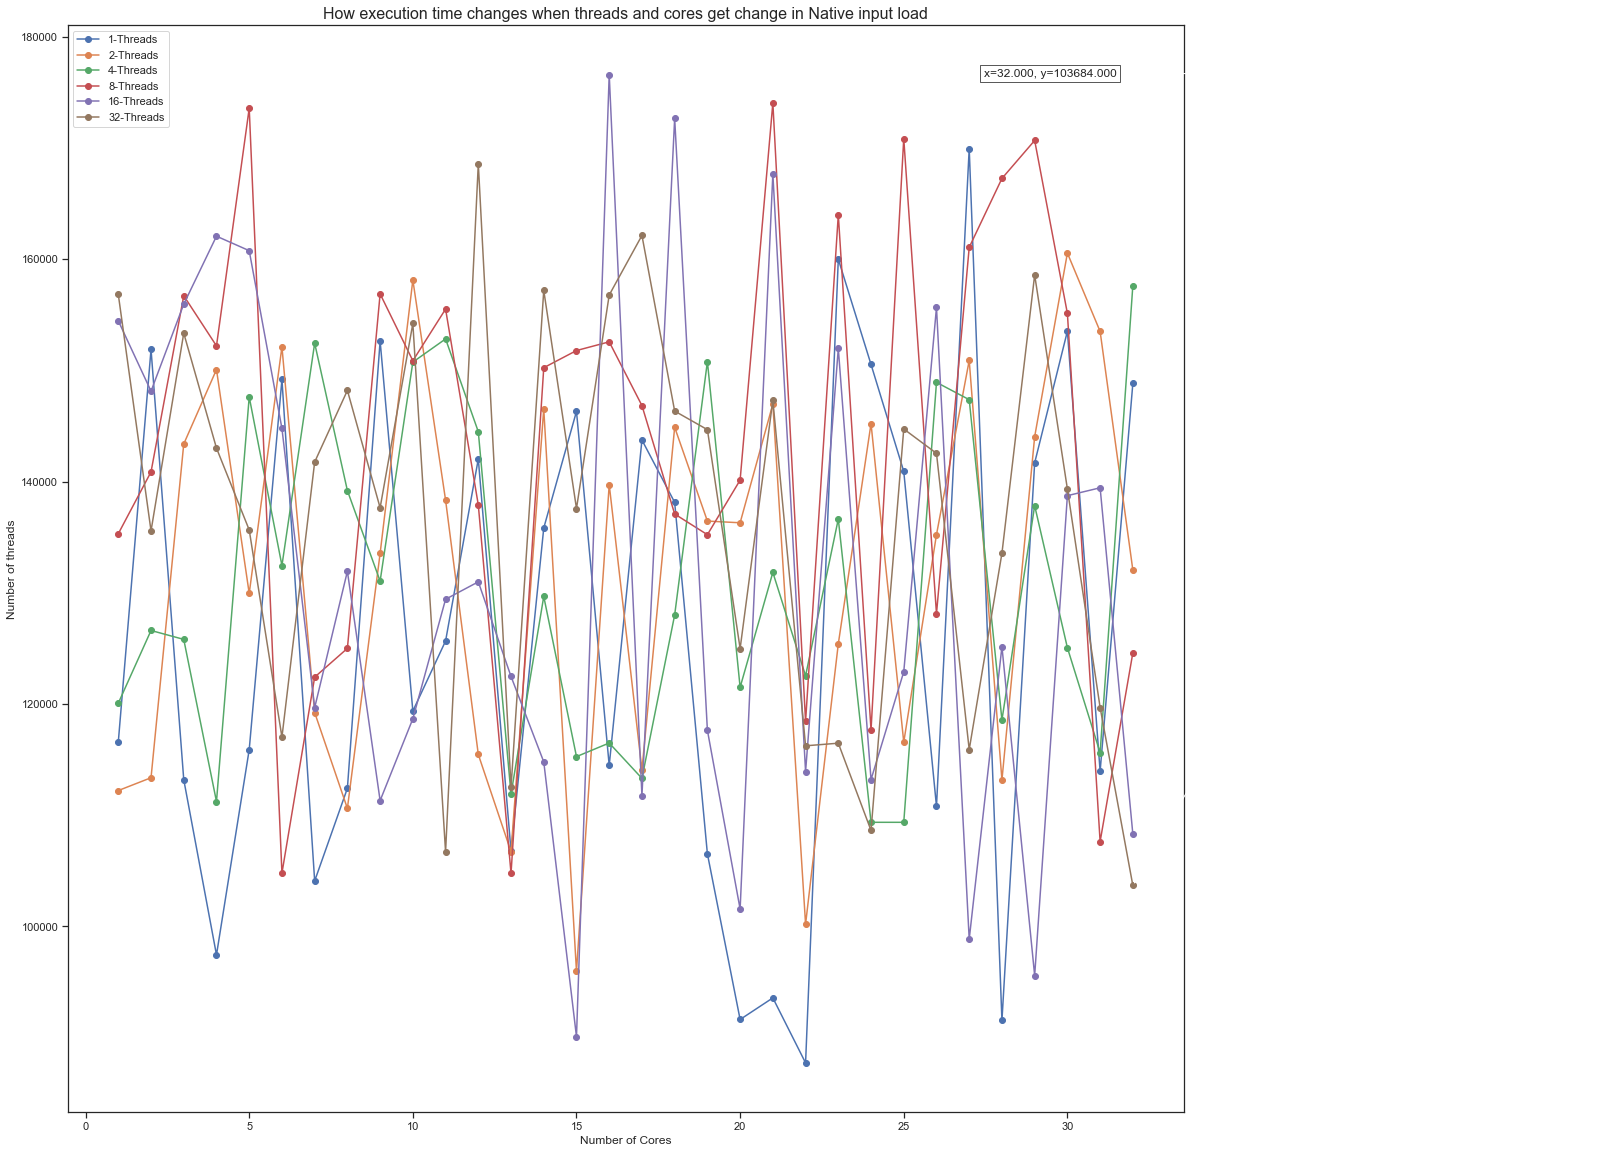

In [252]:
# Filtering for native
inputCombinationData = x264Data.loc[(x264Data['input'] == "native") ]
drawChartForInputs(coresCombinations,inputCombinationData,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change in Native input load",'Number of Cores',"Number of threads")

<Figure size 1440x1440 with 0 Axes>

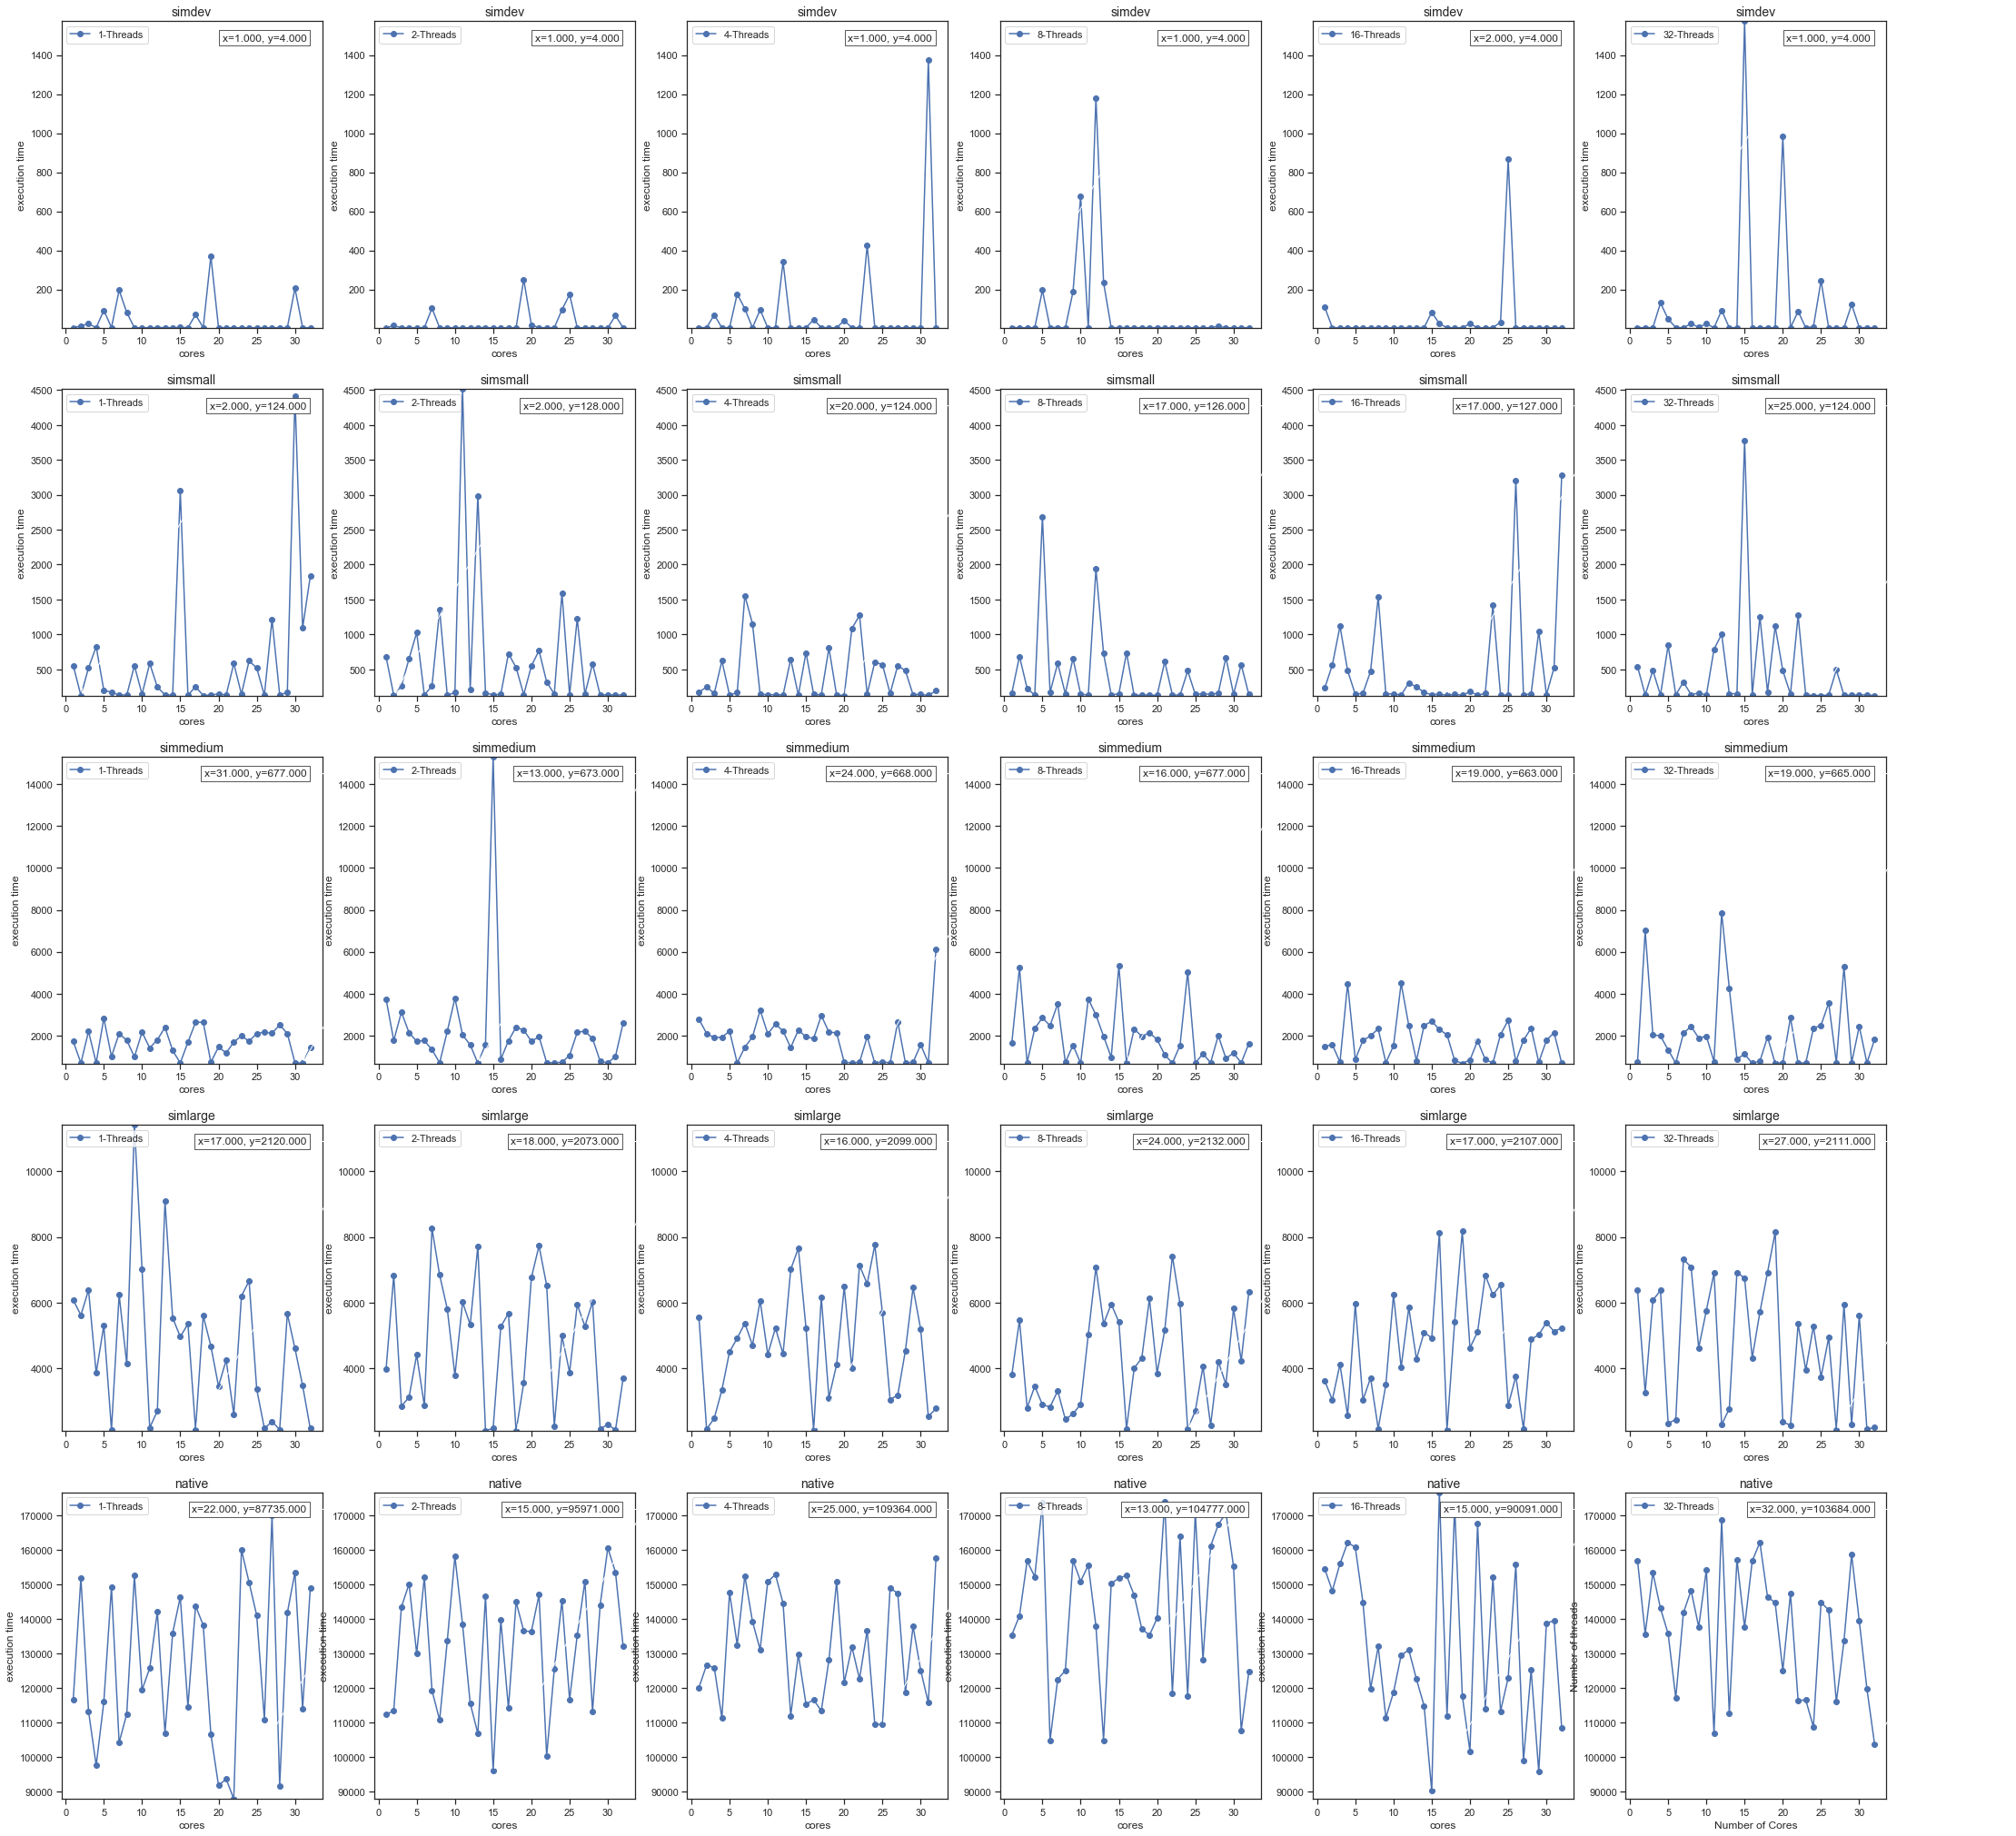

In [253]:
fig=plt.figure() #Creates a new figure
fig, axs = plt.subplots(5,6, figsize=(36, 36))
drawMatrixChartForInputs(coresCombinations,x264Data,axs,threadCombinations,'Threads',"How execution time changes when threads and cores get change",'Number of Cores',"Number of threads")

# Machine Learning Models

In [254]:
# Filtering parallel data 
parallelData = data.loc[(data['compiler'] != "gcc")]
columns = ['name','input','compiler','threads','real','cores']
parallelData = parallelData[columns]

parallelData = parallelData.reindex(columns=["name","input","compiler","cores","threads","real"])

### Transforming categorical columns using dummies

In [255]:
parallelData = pd.get_dummies(parallelData)

## Pair Plots for Dataset

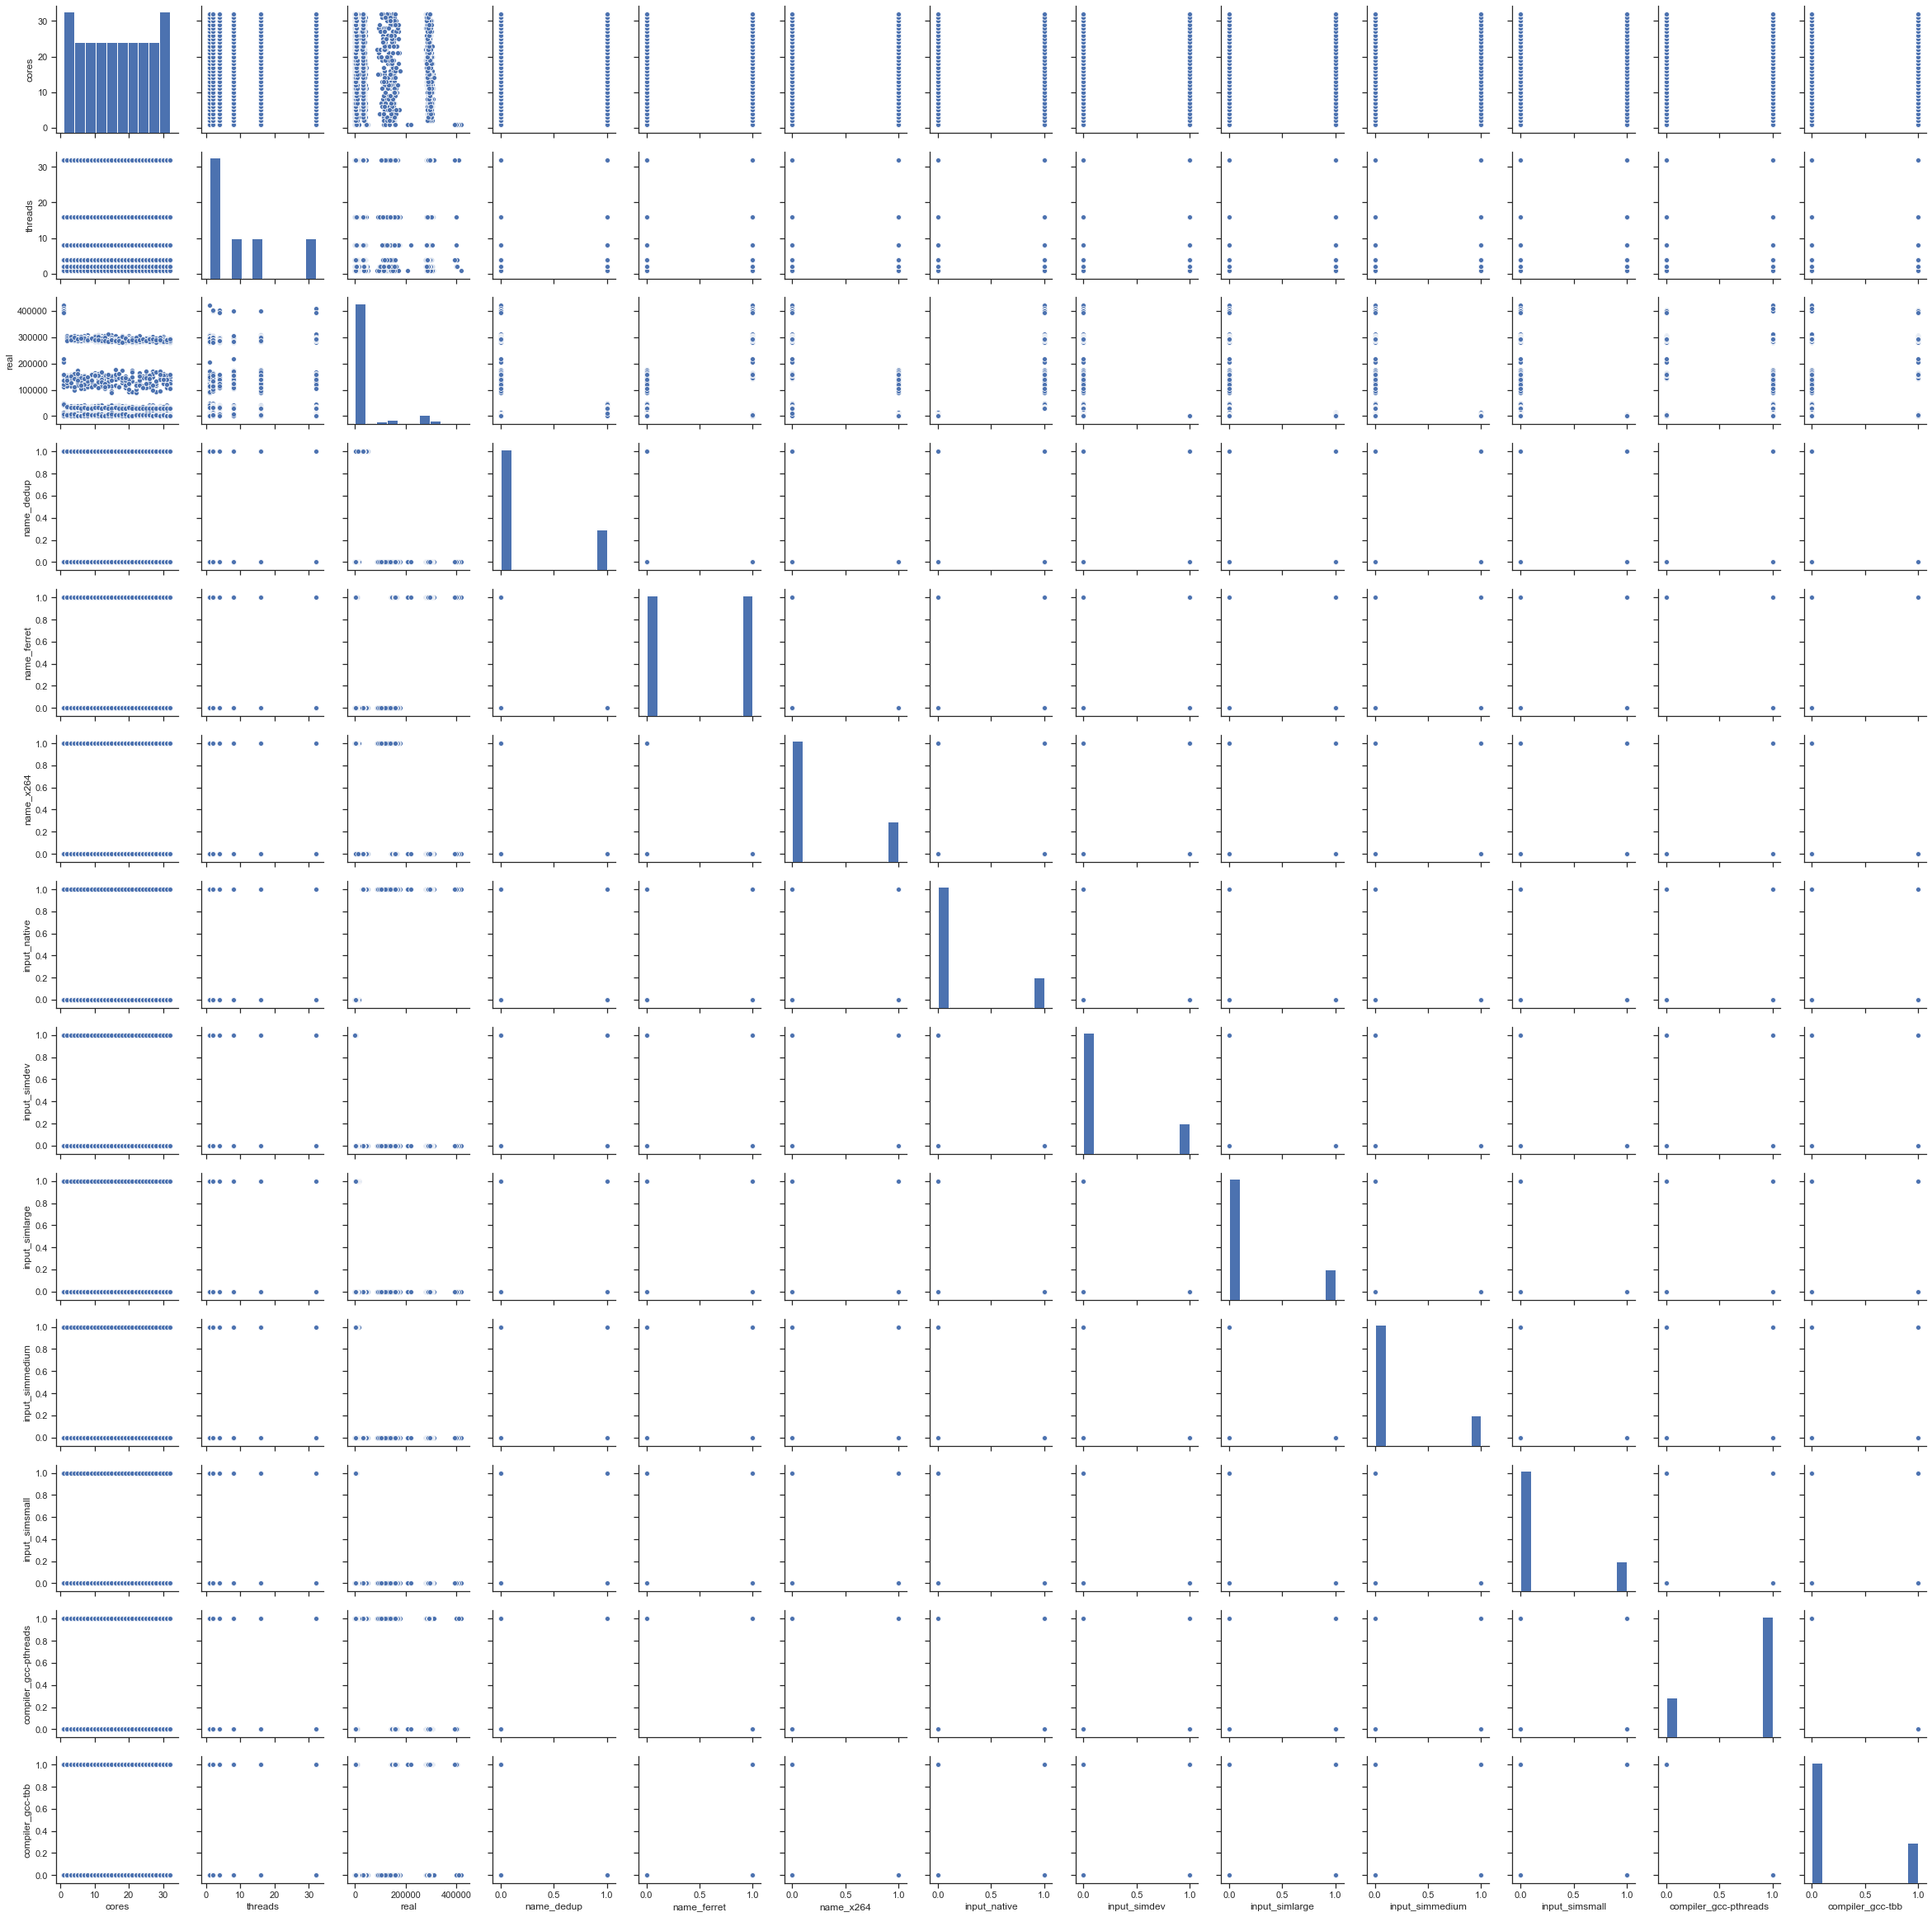

In [256]:
# Creating pair plot
import seaborn as sns; 
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(parallelData)

## ? Issue : Is it necessary to Scale y data and why two scalers

In [257]:
y_data = parallelData['real'] 
x_data = parallelData.drop(['real'],axis=1)

y_data = parallelData.iloc[:,2:3]
x_data = parallelData.drop(['real'],axis=1)
# Scaling the data set
from sklearn.preprocessing import StandardScaler
x_data_scaled = pd.DataFrame( StandardScaler().fit_transform(x_data),columns = x_data.columns)
y_data_scaled = pd.DataFrame( StandardScaler().fit_transform(y_data),columns = y_data.columns)

## ? Issue - How to stratify Data

In [258]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_data_scaled,y_data_scaled)

In [259]:
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
scaler.fit(x_test)

# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)


In [260]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [261]:
model.score(x_test,y_test)

-2.6612015900042003e+23

In [262]:
import statsmodels.api as sm
x = sm.add_constant(x_data_scaled)
results = sm.OLS(y_data_scaled, x).fit()
results.summary()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   real   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     1226.
Date:                Tue, 25 Feb 2020   Prob (F-statistic):               0.00
Time:                        20:41:19   Log-Likelihood:                -2845.3
No. Observations:                3840   AIC:                             5711.
Df Residuals:                    3830   BIC:                             5773.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -1.081e-16      0.008  -1.32e-14      1.000      -0.016       0.016
cores                    -0.0081      0.008     -0.983      0.325      -0.024       0.008
threads                   0.0018      0.008      0.215      0.829      -0.014       0.018
name_dedup             6.234e+11   1.31e+12      0.475      0.634   -1.95e+12    3.19e+12
name_ferret            7.198e+11   1.51e+12      0.475      0.634   -2.25e+12    3.69e+12
name_x264              6.234e+11   1.31e+12      0.475      0.634   -1.95e+12    3.19e+12
input_native          -1.341e+10   2.82e+10     -0.475      0.634   -6.87e+10    4.19e+10
input_simdev          -1.341e+10   2.82e+10     -0.475      0.634   -6.87e+10    4.19e+10
input_simlarge        -1.341e+10   2.82e+10     -0.475      0.634   -6.87e+10    4.19e+10
input_simmedium       -1.341e+10   2.82e+10     -0.475      0.634   -6.87e+10    4.19e+10
input_simsmall        -1.341e+10   2.82e+10     -0.475      0.634   -6.87e+10    4.19e+10
compiler_gcc-pthreads -5.785e+11   1.22e+12     -0.475      0.634   -2.96e+12    1.81e+12
compiler_gcc-tbb      -5.785e+11   1.22e+12     -0.475      0.634   -2.96e+12    1.81e+12
==============================================================================
Omnibus:                      208.126   Durbin-Watson:                   2.485
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.259
Skew:                          -0.186   Prob(JB):                    6.45e-152
Kurtosis:                       5.052   Cond. No.                     5.48e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.71e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Support Vector Machine

In [263]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(x_train,y_train)

regressor.score(x_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9795722106116114

## AdaBoost and Decission Tree Regressor


In [264]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300)

In [265]:
regr_1.fit(x_train,y_train)
regr_2.fit(x_train,y_train)
print("decission Trree Score :"+str(regr_1.score(x_test,y_test)))
print("Adaboost :"+str(regr_2.score(x_test,y_test)))


decission Trree Score :0.9772283001168494
Adaboost :0.9650109016630426


D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Random Forrest Regressor


In [266]:
x_train_ns,x_test_ns,y_train_ns,y_test_ns = train_test_split(x_data,y_data,random_state=5)

from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=50)
randomForest.fit(x_train_ns,y_train_ns)
print("Score of Not Scaled RandomForrest : "+str(randomForest.score(x_test_ns,y_test_ns)))
print("Score of Not Scaled RandomForrest : "+str(randomForest.score(x_train_ns,y_train_ns)))


randomForrest_scaled = RandomForestRegressor(n_estimators=50)
randomForrest_scaled.fit(x_train,y_train)
randomForrest_scaled.score(x_test,y_test)
print("Score of Scaled RandomForrest : "+str(randomForest.score(x_test_ns,y_test_ns)))


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Score of Not Scaled RandomForrest : 0.972545817759158
Score of Not Scaled RandomForrest : 0.9973431390444176
Score of Scaled RandomForrest : 0.972545817759158


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':
